In [1]:
import os
import numpy as np


## Problem Statement - 
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
### Get and Explore the data.
To identify the risky loan we need to analyze only the data which is only related to Charged-off or fully paid

#### 1. Fetch the data in dataframe using read_csv()
# Download loan.csv to run this file which is part of git repo

In [2]:
import pandas as pd
loandataframe=pd.read_csv(r'loan.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 2.Check the basic table and its contents
#### 3.Browse the data

In [3]:
loandataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### 4. identify different columns in the data provided and total data

In [4]:
pd.options.display.max_rows = 4000
list(loandataframe.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
print(loandataframe.shape)
loandataframe.loan_status.value_counts()
# as our aim is to understand the data which is related to risky loan and mostly related to charged off or Fully paid, we can reduce the data set around Fully paid and Charged off
loandataframe=loandataframe[loandataframe.loan_status!="Current"]

(39717, 111)


In [6]:
loandataframe.shape # check the number of rows

(38577, 111)

#### 5. Identify the datatypes of columns, which will help in identifying any mismatch of data present, need to check those columns which have object and are these columns required specific treatment

In [7]:
loandataframe.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### Finding the null values in the data

In [8]:
loandataframe.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
loandataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


In [10]:
# checking for the duplicate columns 
print(loandataframe.id.duplicated().sum())
print(loandataframe.member_id.duplicated().sum())
print(loandataframe.duplicated().sum())
# no duplicate data found in the dataset

0
0
0


### Data Cleaning
#### Finding out which columns needed to be taken in consideration, removing unnecassry columns id and member id have distinct values which means it will not have any specific data which will help in anaylsis

In [11]:
print("id value:",loandataframe.id.nunique())
print("member_id:",loandataframe.member_id.nunique()) # Unique value same as that of number of rows 

id value: 38577
member_id: 38577


* Fix rows and columns
* Fix missing values
* Standardise values
* Fix inavlid values
* Filter data

In [12]:
loandataframe.drop(['id','member_id'],inplace=True,axis=1) # data unique data, required for analysis

In [13]:
loandataframe.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [14]:
print(loandataframe.isnull().all(axis=1).sum())
print(loandataframe.isnull().all(axis=0).sum())

0
55


#### There are 0 empty rows and 55 empty columns, next step is to check which columns have all null or empty values

In [15]:
mostEmptyvalue=loandataframe.isnull().sum()

In [16]:
print(mostEmptyvalue[mostEmptyvalue==38577].count) #38577 is the max row size 
coltodrop=mostEmptyvalue[mostEmptyvalue==38577].index.tolist()
# this will drop the unnecessary columns

<bound method Series.count of next_pymnt_d                      38577
mths_since_last_major_derog       38577
annual_inc_joint                  38577
dti_joint                         38577
verification_status_joint         38577
tot_coll_amt                      38577
tot_cur_bal                       38577
open_acc_6m                       38577
open_il_6m                        38577
open_il_12m                       38577
open_il_24m                       38577
mths_since_rcnt_il                38577
total_bal_il                      38577
il_util                           38577
open_rv_12m                       38577
open_rv_24m                       38577
max_bal_bc                        38577
all_util                          38577
total_rev_hi_lim                  38577
inq_fi                            38577
total_cu_tl                       38577
inq_last_12m                      38577
acc_open_past_24mths              38577
avg_cur_bal                       38577
bc_open_to

In [17]:
loandataframe.drop(coltodrop,inplace=True,axis=1) # drop all the columns which have empty values 

In [18]:
loandataframe.shape # check if the drop happen

(38577, 54)

In [19]:
print(loandataframe.loan_amnt.describe())
print(loandataframe.int_rate.describe())

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object


In [20]:
print(loandataframe.pymnt_plan.value_counts()) # all values have n
print(loandataframe.initial_list_status.value_counts()) # all values as f
print(loandataframe.chargeoff_within_12_mths.value_counts()) # 39661 out of 39717 having 0.0 values
print(loandataframe.delinq_amnt.value_counts()) # all values having 0
print(loandataframe.tax_liens.value_counts()) # 39678 out of 39717 having 0.0 values

n    38577
Name: pymnt_plan, dtype: int64
f    38577
Name: initial_list_status, dtype: int64
0.0    38521
Name: chargeoff_within_12_mths, dtype: int64
0    38577
Name: delinq_amnt, dtype: int64
0.0    38538
Name: tax_liens, dtype: int64


In [21]:
print(loandataframe.mths_since_last_delinq.value_counts()) # having different values

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
38.0     233
19.0     232
22.0     228
20.0     226
18.0     225
35.0     223
32.0     221
31.0     220
25.0     219
39.0     218
37.0     216
45.0     215
26.0     210
21.0     208
10.0     208
16.0     207
17.0     206
27.0     206
42.0     204
29.0     204
36.0     202
47.0     202
43.0     194
40.0     192
41.0     192
12.0     191
34.0     191
46.0     190
44.0     190
48.0     189
6.0      188
14.0     188
28.0     184
33.0     181
7.0      172
9.0      171
8.0      165
13.0     165
11.0     159
49.0     149
4.0      147
58.0     147
5.0      145
3.0      143
53.0     142
59.0     141
52.0     134
56.0     129
50.0     129
73.0     127
55.0     127
63.0     126
60.0     123
72.0     122
68.0     122
57.0     120
71.0     119
70.0     117
54.0     114
74.0     113
62.0     111
67.0     108
75.0     108
76.0     107
61.0     107
51.0     106
69.0     105
79.0     101
2.0      101
66.0      97
64.0      94
80.0      91

#### Columns which needs to standardise and cleaned
1. int_rate,revol_util = % can be removed, so that mathemetical calculation can be done , in case required
2. emp_tile = empty values can be replaced with notunknow or can be removed alltogether
3. emp_length = a drived metrices can be created from the data with only number of years and also remove na data
4. issue_d =Convert data type in month and year
5. pymnt_plan can be removed as there is same data and not related 
6. Url is just and additional info and doesn't help in solving the issue and can be removed
7. Desc - lot of empty rows , however there seems to link with desc purpose and title , some time pupose varies from description
8. Zip_code - from zip code , we can identify which area have maxium loan, however area is much more specific
9. initial_list_status can also be removed as there are no data which help in analysis
10. chargeoff_within_12_mths, delinq_amt, tax_liens - no relevant data
11. mths_since_last_delinq, mths_since_last_record both having NA values which can be filled in by 0 as those who doesn't have defaults should have 0 associated with.
12. Add additional loanstatus numeric columns, 0 if its fullpaid 1 if its Charged off

In [22]:
# function to extract only digits
def fetchdigit(strng):
    tempdigit=''
    for i in strng:
        if i.isdigit():
            tempdigit=tempdigit+str(i)
    return int(tempdigit)


In [23]:
# function to remove outlier 
def findremout(dataseries):
    q1=dataseries.quantile(.25)
    q3=dataseries.quantile(.75)
    iqr=q3-q1
    upoutlierind=np.where(dataseries>=(q3+1.5*iqr))
    lwoutlierind=np.where(dataseries<=(q1-1.5*iqr))
    return [upoutlierind,lwoutlierind]

In [24]:
loandataframe['int_rate']=loandataframe['int_rate'].str.rstrip('%').apply(lambda x: float(x)) # Removing % from int_rate #1

In [25]:
loandataframe['revol_util']=loandataframe['revol_util'].str.rstrip('%').fillna(0).apply(lambda x: float(x)) # Removing % from revol_util #1

In [26]:
loandataframe['emp_title'].fillna('undisclosed',inplace=True) #2


In [27]:
loandataframe.emp_length.fillna('0',inplace=True) #3. Empty value is replaced with 0


In [28]:
loandataframe['emp_length']=loandataframe.emp_length.apply(fetchdigit) #3 Converting employee length to numbers 


In [29]:
loandataframe[['issue_m','issue_y']]=loandataframe['issue_d'].str.split('-',expand=True) # splitting into two columns month and year #4

In [30]:
additionalColumnToDrop=['pymnt_plan','url','initial_list_status','chargeoff_within_12_mths','delinq_amnt','tax_liens'] #5,#6 #8 #10
loandataframe.drop(additionalColumnToDrop,inplace=True,axis=1) # droping all columns which have less significance

In [31]:
loandataframe.mths_since_last_delinq.fillna(0,inplace=True)#11

In [32]:
loandataframe['loan_status_int']=loandataframe.loan_status.apply(lambda x : 1 if x=='Charged Off' else 0 )

In [33]:
loandataframe=loandataframe.round(2) # rounding of the number values to two digit

##### Most of the cleaning activities are done, before proceeding lets check the data

In [34]:
#print(loandataframe.info())
print(loandataframe.describe().round(2))
#print(loandataframe.value_counts())
print(loandataframe.shape)

       loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
count   38577.00     38577.00         38577.00  38577.00     38577.00   
mean    11047.03     10784.06         10222.48     11.93       322.47   
std      7348.44      7090.31          7022.72      3.69       208.64   
min       500.00       500.00             0.00      5.42        15.69   
25%      5300.00      5200.00          5000.00      8.94       165.74   
50%      9600.00      9550.00          8733.44     11.71       277.86   
75%     15000.00     15000.00         14000.00     14.38       425.55   
max     35000.00     35000.00         35000.00     24.40      1305.19   

       emp_length  annual_inc       dti  delinq_2yrs  inq_last_6mths  ...  \
count    38577.00    38577.00  38577.00     38577.00        38577.00  ...   
mean         4.93    68777.97     13.27         0.15            0.87  ...   
std          3.45    64218.68      6.67         0.49            1.07  ...   
min          0.00     4000.00     

    #### Checking all the columns for thier respective data type  and convert it numeric if required

In [35]:
loandataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   38577 non-null  object 
 9   emp_length                  38577 non-null  int64  
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  issue_d                     385

In [36]:
loandataframe.term

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 38577, dtype: object

#### Univarate analysis
1. loan_amnt                   
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. installment
6. annual_inc
7. dti
8. delinq_2yrs
9. inq_last_6mths
10. mths_since_last_delinq
11. total_acc
12. out_prncp
13. out_prncp_inv 
14. total_pymnt
15. total_pymnt_inv
16. total_rec_prncp
17. total_rec_int
18. total_rec_late_fee
Statistical details using .describe()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
def dataOverview(dataframe,dataSeries,bin=5):
    print("Data for :"+dataSeries)
    print("Describe Data: \n",dataframe[dataSeries].describe().round(2))
    print("ValueCount Data: \n",dataframe[dataSeries].value_counts(bins=bin).round(2))
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    sns.boxplot(dataframe[dataSeries])
    plt.title(dataSeries)
    plt.subplot(222)
    plt.hist(dataframe[dataSeries],bins=bin)
    plt.title(dataSeries)
    plt.show() 
# this function will generate data related to specific attribute and helps in analyzing the data by drawing boxplot and histogram    

In [39]:
def dataAnalysis(dataframe,columname,bin=5):
    print("Full data \n ValueCount :\n",dataframe[columname].value_counts(bins=bin).round(2))
    print("Charged off \n ValueCount \n",dataframe[loandataframe.loan_status=='Charged Off'][columname].value_counts(bins=bin).round(2))
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    loandataframe[loandataframe.loan_status=='Charged Off'][columname].value_counts(bins=bin,normalize=True).plot(kind='bar')
    plt.title('Charged Off')
    plt.subplot(222)
    loandataframe[columname].value_counts(bins=bin, normalize=True).plot(kind='bar')
    plt.title('Full Data')
    plt.show()
# this function will generate data related to specific attribute and creat bar graphs   

##### loan_amt

Data for :loan_amnt
Describe Data: 
 count    38577.00
mean     11047.03
std       7348.44
min        500.00
25%       5300.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64
ValueCount Data: 
 (3950.0, 5675.0]      5294
(5675.0, 7400.0]      4499
(9125.0, 10850.0]     4126
(7400.0, 9125.0]      3860
(14300.0, 16025.0]    3314
(10850.0, 12575.0]    3277
(2225.0, 3950.0]      3152
(19475.0, 21200.0]    1978
(465.499, 2225.0]     1838
(12575.0, 14300.0]    1638
(24650.0, 26375.0]    1423
(17750.0, 19475.0]    1017
(22925.0, 24650.0]     759
(16025.0, 17750.0]     663
(33275.0, 35000.0]     640
(21200.0, 22925.0]     391
(29825.0, 31550.0]     370
(26375.0, 28100.0]     212
(31550.0, 33275.0]      64
(28100.0, 29825.0]      62
Name: loan_amnt, dtype: int64


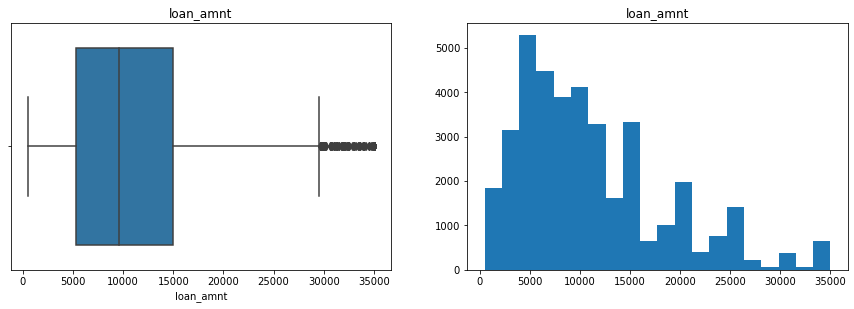

In [40]:
dataOverview(loandataframe,'loan_amnt',20)
# maximum loan amount requests as 35000 and most of the data belongs 5500 - 15000


In [41]:
# based on box plot, upper extreme outliers are visible, which can be removed 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.loan_amnt)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :loan_amnt
Describe Data: 
 count    37488.00
mean     10407.59
std       6397.48
min        500.00
25%       5000.00
50%       9250.00
75%      14956.25
max      29500.00
Name: loan_amnt, dtype: float64
ValueCount Data: 
 (6300.0, 12100.0]     13248
(470.999, 6300.0]     12524
(12100.0, 17900.0]     5902
(17900.0, 23700.0]     3505
(23700.0, 29500.0]     2309
Name: loan_amnt, dtype: int64


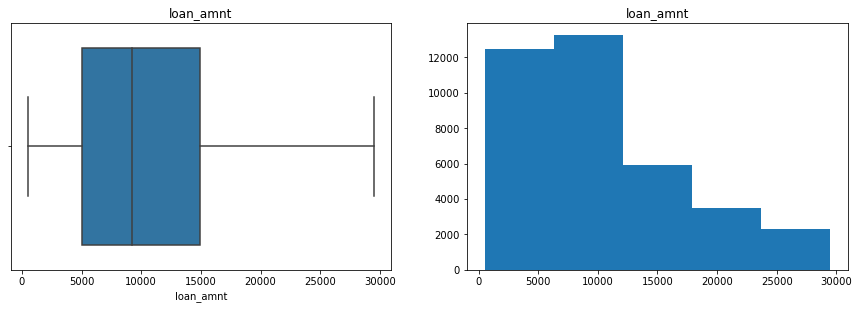

In [42]:
#Verify if the outlier is removed correctly
dataOverview(loandataframe,'loan_amnt')


Full data 
 ValueCount :
 (5000.0, 10000.0]     12802
(1000.0, 5000.0]       9162
(10000.0, 15000.0]     7683
(15000.0, 20000.0]     4349
(20000.0, 25000.0]     2836
(25000.0, 35000.0]      346
(500.0, 1000.0]         305
(-0.001, 500.0]           5
Name: loan_amnt, dtype: int64
Charged off 
 ValueCount 
 (5000.0, 10000.0]     1642
(1000.0, 5000.0]      1267
(10000.0, 15000.0]    1055
(15000.0, 20000.0]     751
(20000.0, 25000.0]     542
(25000.0, 35000.0]      71
(500.0, 1000.0]         47
(-0.001, 500.0]          0
Name: loan_amnt, dtype: int64


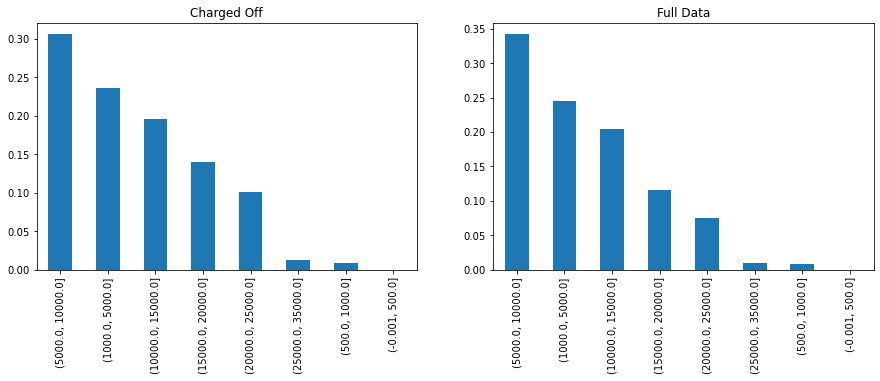

In [43]:
dataAnalysis(loandataframe,'loan_amnt',[0,500,1000,5000,10000,15000,20000,25000,35000])
# Most of the loan amount is for (500.0, 5500.0] | (5000, 10000.0]
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000 

##### funded_amnt_inv

Data for :funded_amnt_inv
Describe Data: 
 count    37488.00
mean      9634.04
std       6134.26
min          0.00
25%       4989.38
50%       8374.12
75%      13400.00
max      29300.00
Name: funded_amnt_inv, dtype: float64
ValueCount Data: 
 (5860.0, 7325.0]                 4314
(8790.0, 10255.0]                4242
(4395.0, 5860.0]                 4206
(2930.0, 4395.0]                 3788
(7325.0, 8790.0]                 3114
(11720.0, 13185.0]               2972
(1465.0, 2930.0]                 2615
(14650.0, 16115.0]               2503
(13185.0, 14650.0]               1592
(10255.0, 11720.0]               1415
(19045.0, 20510.0]               1393
(-29.301000000000002, 1465.0]    1320
(23440.0, 24905.0]                923
(17580.0, 19045.0]                903
(16115.0, 17580.0]                721
(24905.0, 26370.0]                476
(20510.0, 21975.0]                438
(21975.0, 23440.0]                351
(27835.0, 29300.0]                124
(26370.0, 27835.0]                

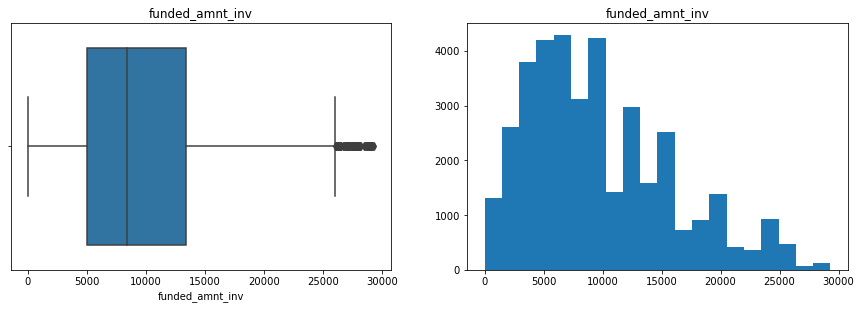

In [44]:
dataOverview(loandataframe,'funded_amnt_inv',20)
# Upper outliers are visible from box, the data cane be cleaned to further analysis and process

In [45]:
# Remove outlier value
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.funded_amnt_inv)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :funded_amnt_inv
Describe Data: 
 count    37274.00
mean      9530.11
std       5995.82
min          0.00
25%       4975.00
50%       8250.00
75%      13140.34
max      26000.00
Name: funded_amnt_inv, dtype: float64
ValueCount Data: 
 (5200.0, 10400.0]     12836
(-26.001, 5200.0]     10879
(10400.0, 15600.0]     7626
(15600.0, 20800.0]     3830
(20800.0, 26000.0]     2103
Name: funded_amnt_inv, dtype: int64


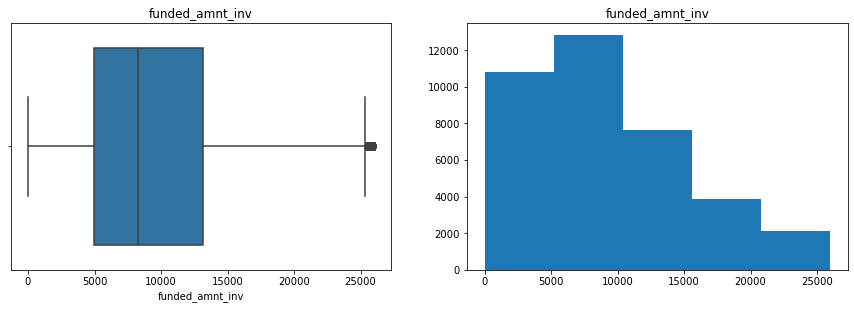

In [46]:
dataOverview(loandataframe,'funded_amnt_inv')
# Verify if the outlier is removed 

Full data 
 ValueCount :
 (5000.0, 10000.0]     12752
(1000.0, 5000.0]       9835
(10000.0, 15000.0]     7601
(15000.0, 20000.0]     3949
(20000.0, 25000.0]     2209
(500.0, 1000.0]         559
(-0.001, 500.0]         304
(25000.0, 35000.0]       65
Name: funded_amnt_inv, dtype: int64
Charged off 
 ValueCount 
 (5000.0, 10000.0]     1624
(1000.0, 5000.0]      1429
(10000.0, 15000.0]    1042
(15000.0, 20000.0]     702
(20000.0, 25000.0]     384
(500.0, 1000.0]         76
(-0.001, 500.0]         74
(25000.0, 35000.0]      16
Name: funded_amnt_inv, dtype: int64


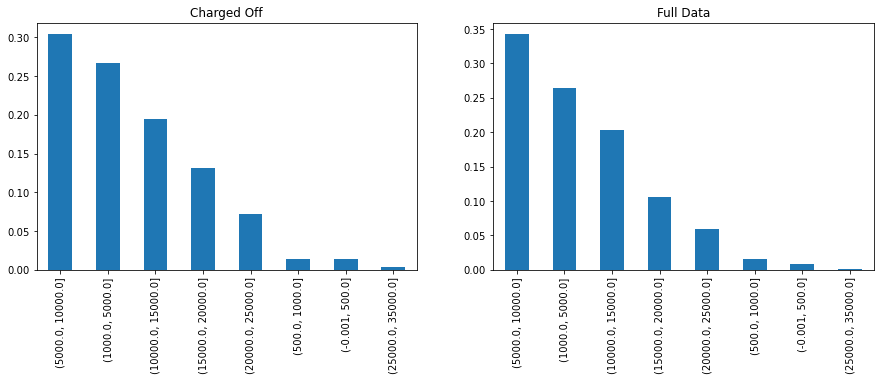

In [47]:
dataAnalysis(loandataframe,'funded_amnt_inv',[0,500,1000,5000,10000,15000,20000,25000,35000])
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000  

##### int_rate

Data for :int_rate
Describe Data: 
 count    37274.00
mean        11.81
std          3.61
min          5.42
25%          8.90
50%         11.71
75%         14.27
max         24.40
Name: int_rate, dtype: float64
ValueCount Data: 
 (11.114, 13.012]               7109
(9.216, 11.114]                6738
(13.012, 14.91]                6049
(7.318, 9.216]                 5166
(5.3999999999999995, 7.318]    4567
(14.91, 16.808]                4339
(16.808, 18.706]               2112
(18.706, 20.604]                803
(20.604, 22.502]                352
(22.502, 24.4]                   39
Name: int_rate, dtype: int64


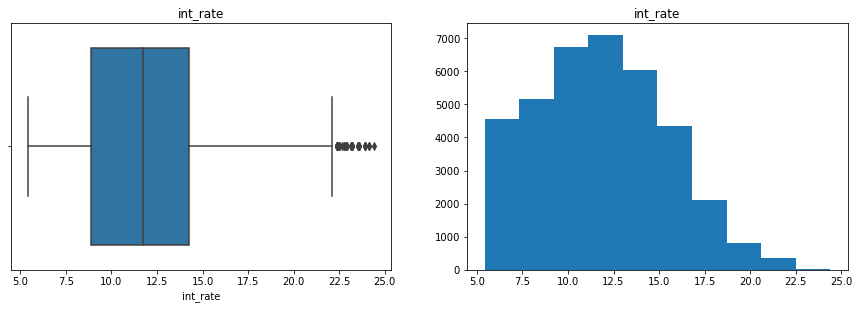

In [48]:
dataOverview(loandataframe,'int_rate',10)
# Data shows that intrest rates are less than and equal to 14% for 75%, However the max interest is charged at 24% 

Full data 
 ValueCount :
 (14.0, 20.0]     9286
(10.0, 12.0]     8162
(4.0, 8.0]       8141
(12.0, 14.0]     7083
(8.0, 10.0]      4029
(20.0, 24.0]      569
(-0.001, 2.0]       0
(2.0, 4.0]          0
Name: int_rate, dtype: int64
Charged off 
 ValueCount 
 (14.0, 20.0]     2128
(12.0, 14.0]     1126
(10.0, 12.0]     1043
(4.0, 8.0]        436
(8.0, 10.0]       389
(20.0, 24.0]      223
(-0.001, 2.0]       0
(2.0, 4.0]          0
Name: int_rate, dtype: int64


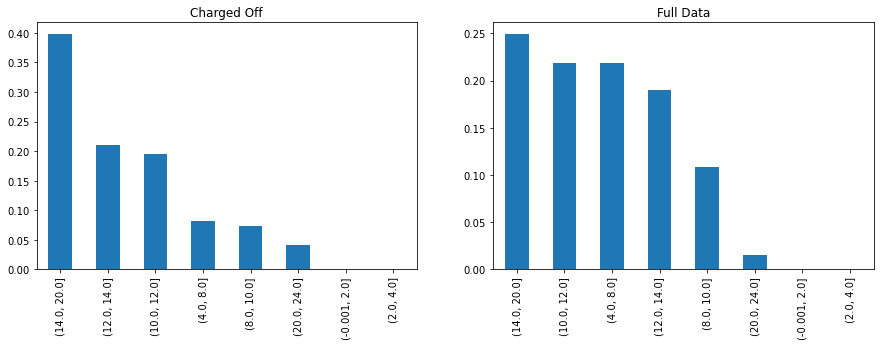

In [49]:
dataAnalysis(loandataframe,'int_rate',[0,2,4,8,10,12,14,20,24])
# Charged off loan also happens for loan amount which is mostly in demand 1000,5000 -10000 

##### installment

Data for :installment
Describe Data: 
 count    37274.00
mean       304.14
std        184.21
min         15.69
25%        163.11
50%        269.48
75%        402.80
max        950.12
Name: installment, dtype: float64
ValueCount Data: 
 (155.854, 202.576]    4875
(296.019, 342.74]     3881
(202.576, 249.297]    3790
(109.133, 155.854]    3780
(249.297, 296.019]    3335
(62.412, 109.133]     3268
(342.74, 389.462]     2878
(389.462, 436.184]    2081
(482.905, 529.627]    1838
(436.184, 482.905]    1657
(14.755, 62.412]      1394
(529.627, 576.348]    1054
(623.07, 669.791]      793
(576.348, 623.07]      790
(669.791, 716.512]     602
(809.956, 856.677]     441
(763.234, 809.956]     283
(856.677, 903.398]     266
(716.512, 763.234]     224
(903.398, 950.12]       44
Name: installment, dtype: int64


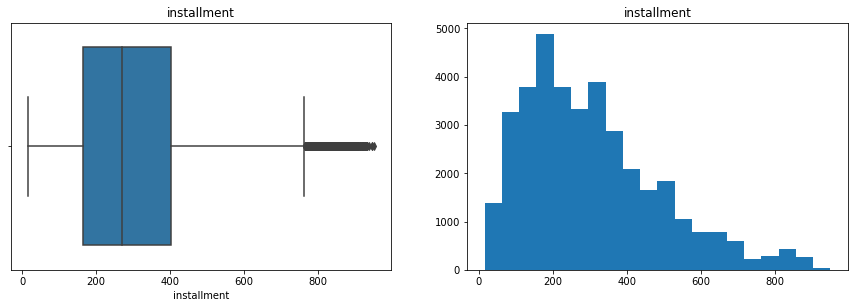

In [50]:
dataOverview(loandataframe,'installment',20)

In [51]:
# installment data seems to have large number of outlier and that to at extreme end removing the outlier will help in analyzing the data in much better way
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.installment)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :installment
Describe Data: 
 count    36240.00
mean       289.02
std        163.14
min         15.69
25%        161.32
50%        262.33
75%        389.36
max        762.08
Name: installment, dtype: float64
ValueCount Data: 
 (164.968, 314.246]               12458
(14.943000000000001, 164.968]     9554
(314.246, 463.524]                8205
(463.524, 612.802]                4224
(612.802, 762.08]                 1799
Name: installment, dtype: int64


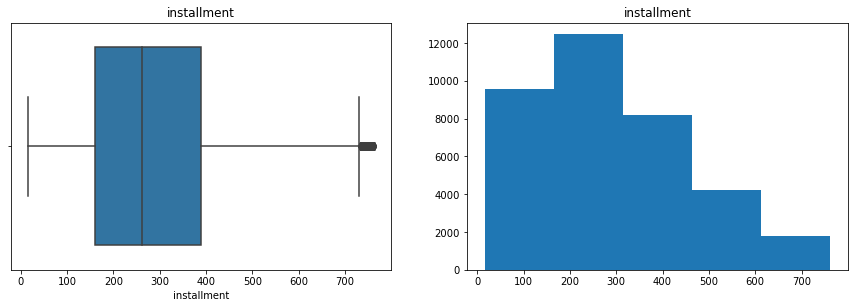

In [52]:
dataOverview(loandataframe,'installment')

Full data 
 ValueCount :
 (100.0, 200.0]    9096
(200.0, 300.0]    7608
(300.0, 400.0]    7124
(400.0, 500.0]    3931
(50.0, 100.0]     3146
(500.0, 600.0]    2520
(600.0, 700.0]    1640
(14.999, 50.0]     832
(700.0, 800.0]     343
Name: installment, dtype: int64
Charged off 
 ValueCount 
 (100.0, 200.0]    1213
(200.0, 300.0]    1068
(300.0, 400.0]     994
(400.0, 500.0]     602
(50.0, 100.0]      465
(500.0, 600.0]     420
(600.0, 700.0]     253
(14.999, 50.0]     135
(700.0, 800.0]      45
Name: installment, dtype: int64


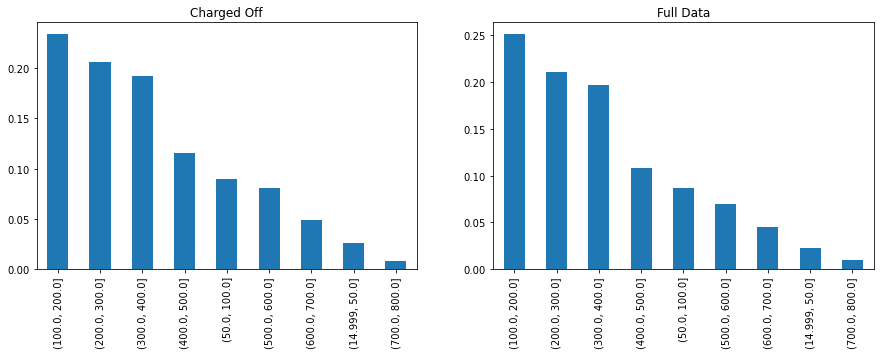

In [53]:
dataAnalysis(loandataframe,'installment',[15,50,100,200,300,400,500,600,700,800])

##### fund_amnt

Data for :funded_amnt
Describe Data: 
 count    36240.00
mean      9665.58
std       5621.00
min        500.00
25%       5000.00
50%       8800.00
75%      13200.00
max      28000.00
Name: funded_amnt, dtype: float64
ValueCount Data: 
 (4625.0, 6000.0]      5518
(8750.0, 10125.0]     4491
(7375.0, 8750.0]      3098
(1875.0, 3250.0]      3000
(11500.0, 12875.0]    2839
(3250.0, 4625.0]      2772
(6000.0, 7375.0]      2553
(14250.0, 15625.0]    2520
(19750.0, 21125.0]    1730
(12875.0, 14250.0]    1493
(15625.0, 17000.0]    1336
(10125.0, 11500.0]    1274
(472.499, 1875.0]     1152
(17000.0, 18375.0]     913
(23875.0, 25250.0]     680
(18375.0, 19750.0]     387
(21125.0, 22500.0]     297
(22500.0, 23875.0]     127
(25250.0, 26625.0]      48
(26625.0, 28000.0]      12
Name: funded_amnt, dtype: int64


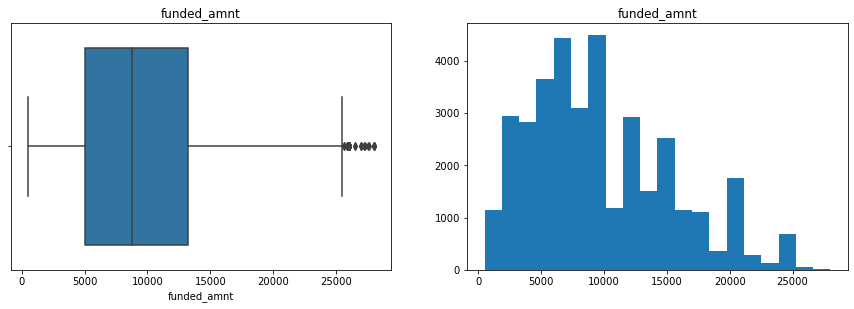

In [54]:
dataOverview(loandataframe,'funded_amnt',20)
# few outliers seems to be present 

Full data 
 ValueCount :
 (5000.0, 10000.0]     12997
(1000.0, 5000.0]       9244
(10000.0, 15000.0]     7870
(15000.0, 20000.0]     4317
(20000.0, 25000.0]     1436
(500.0, 1000.0]         306
(25000.0, 35000.0]       65
(-0.001, 500.0]           5
Name: funded_amnt, dtype: int64
Charged off 
 ValueCount 
 (5000.0, 10000.0]     1664
(1000.0, 5000.0]      1283
(10000.0, 15000.0]    1092
(15000.0, 20000.0]     771
(20000.0, 25000.0]     315
(500.0, 1000.0]         48
(25000.0, 35000.0]      22
(-0.001, 500.0]          0
Name: funded_amnt, dtype: int64


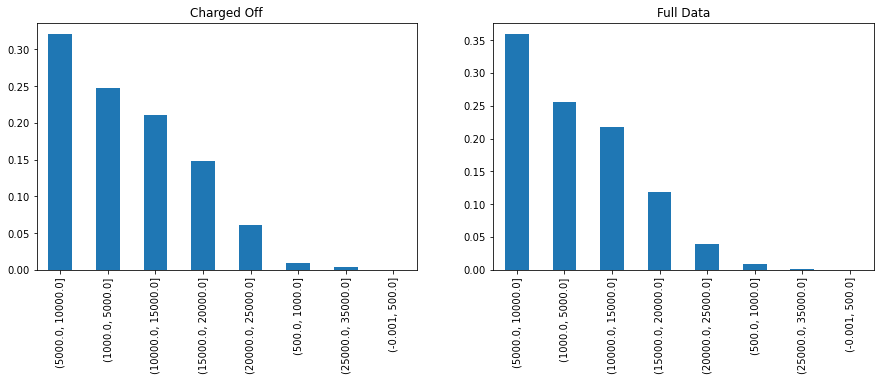

In [55]:
dataAnalysis(loandataframe,'funded_amnt',[0,500,1000,5000,10000,15000,20000,25000,35000])
# funded amount in range of 5000 -10000 have maximum Charge off 

##### annual_inc

Data for :annual_inc
Describe Data: 
 count      36240.00
mean       65549.29
std        62082.91
min         4000.00
25%        40000.00
50%        56000.00
75%        79000.00
max      6000000.00
Name: annual_inc, dtype: float64
ValueCount Data: 
 (-1996.001, 1203200.0]    36232
(1203200.0, 2402400.0]        6
(3601600.0, 4800800.0]        1
(4800800.0, 6000000.0]        1
(2402400.0, 3601600.0]        0
Name: annual_inc, dtype: int64


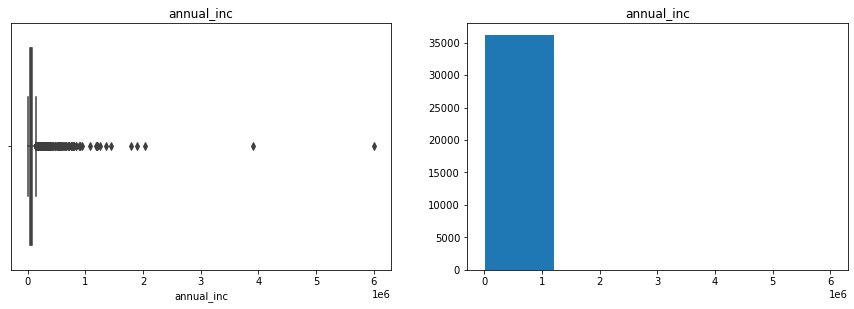

In [56]:
dataOverview(loandataframe,'annual_inc',5)

In [57]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.annual_inc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :annual_inc
Describe Data: 
 count     34660.00
mean      58901.27
std       26478.33
min        4000.00
25%       39600.00
50%       54996.00
75%       75000.00
max      137496.00
Name: annual_inc, dtype: float64
ValueCount Data: 
 (30699.2, 57398.4]               14038
(57398.4, 84097.6]                9936
(3866.5029999999997, 30699.2]     4615
(84097.6, 110796.8]               4367
(110796.8, 137496.0]              1704
Name: annual_inc, dtype: int64


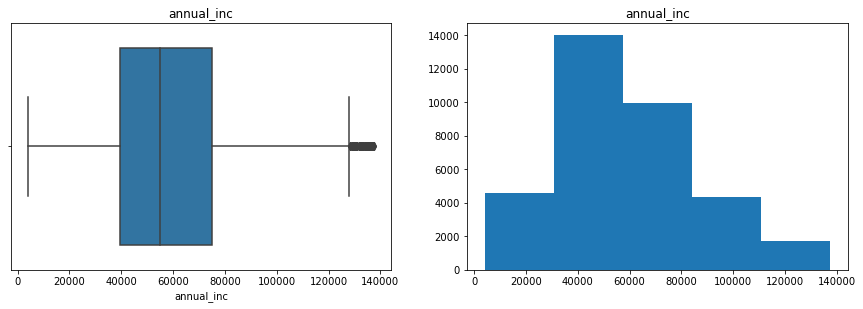

In [58]:
# Verify the data post removing outlier
dataOverview(loandataframe,'annual_inc',5)

Full data 
 ValueCount :
 (40000.0, 50000.0]      5642
(50000.0, 60000.0]      5405
(30000.0, 40000.0]      5139
(60000.0, 70000.0]      3879
(20000.0, 30000.0]      3371
(70000.0, 80000.0]      3235
(80000.0, 90000.0]      2253
(100000.0, 120000.0]    1985
(90000.0, 100000.0]     1769
(10000.0, 20000.0]      1082
(120000.0, 140000.0]     802
(3999.999, 10000.0]       98
Name: annual_inc, dtype: int64
Charged off 
 ValueCount 
 (30000.0, 40000.0]      912
(40000.0, 50000.0]      853
(50000.0, 60000.0]      817
(20000.0, 30000.0]      602
(60000.0, 70000.0]      516
(70000.0, 80000.0]      405
(80000.0, 90000.0]      250
(10000.0, 20000.0]      217
(90000.0, 100000.0]     183
(100000.0, 120000.0]    177
(120000.0, 140000.0]     83
(3999.999, 10000.0]      20
Name: annual_inc, dtype: int64


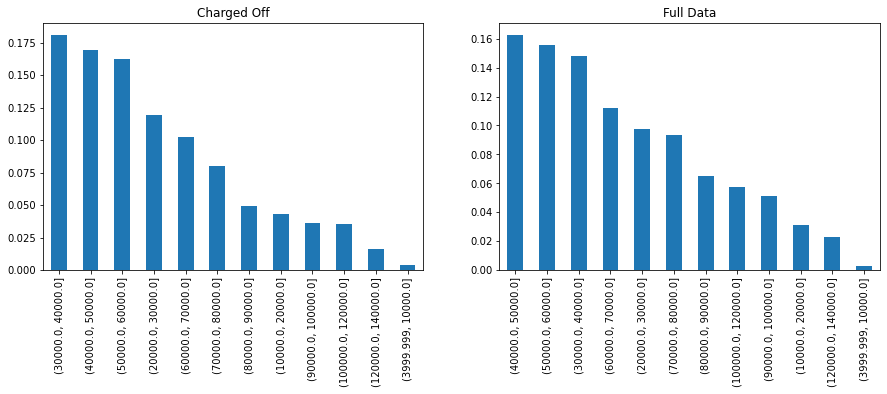

In [59]:
bin=[4000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000]
dataAnalysis(loandataframe,'annual_inc',bin)
# 30 k to 60K have maximum chargoff

##### dti

Data for :dti
Describe Data: 
 count    34660.00
mean        13.42
std          6.67
min          0.00
25%          8.30
50%         13.52
75%         18.70
max         29.99
Name: dti, dtype: float64
ValueCount Data: 
 (11.996, 17.994]    10235
(5.998, 11.996]      9043
(17.994, 23.992]     8242
(-0.031, 5.998]      5564
(23.992, 29.99]      1576
Name: dti, dtype: int64


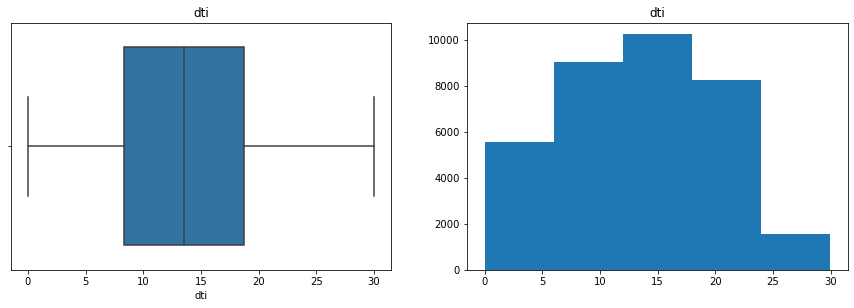

In [60]:
dataOverview(loandataframe,'dti')
#Data seems to be well distributed

Full data 
 ValueCount :
 (12.0, 14.0]     3534
(14.0, 16.0]     3502
(10.0, 12.0]     3334
(16.0, 18.0]     3203
(18.0, 20.0]     3094
(8.0, 10.0]      3056
(20.0, 22.0]     2710
(6.0, 8.0]       2659
(22.0, 24.0]     2417
(4.0, 6.0]       2262
(2.0, 4.0]       1740
(-0.001, 2.0]    1595
(24.0, 26.0]     1121
(26.0, 28.0]      255
(28.0, 30.0]      178
Name: dti, dtype: int64
Charged off 
 ValueCount 
 (12.0, 14.0]     534
(14.0, 16.0]     513
(18.0, 20.0]     505
(16.0, 18.0]     497
(20.0, 22.0]     464
(10.0, 12.0]     449
(22.0, 24.0]     412
(8.0, 10.0]      402
(6.0, 8.0]       335
(4.0, 6.0]       260
(2.0, 4.0]       219
(-0.001, 2.0]    206
(24.0, 26.0]     188
(26.0, 28.0]      30
(28.0, 30.0]      21
Name: dti, dtype: int64


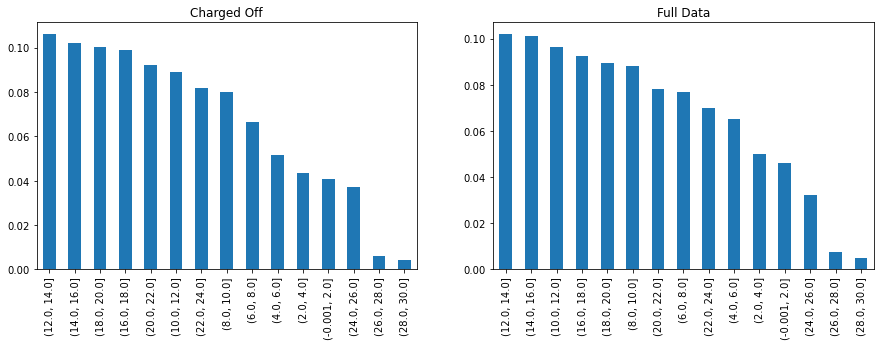

In [61]:
bin=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
dataAnalysis(loandataframe,'dti',bin)


##### delinq_2yrs

Data for :delinq_2yrs
Describe Data: 
 count    34660.00
mean         0.15
std          0.49
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         11.00
Name: delinq_2yrs, dtype: float64
ValueCount Data: 
 (-0.012, 2.2]    34376
(2.2, 4.4]         248
(4.4, 6.6]          28
(6.6, 8.8]           6
(8.8, 11.0]          2
Name: delinq_2yrs, dtype: int64


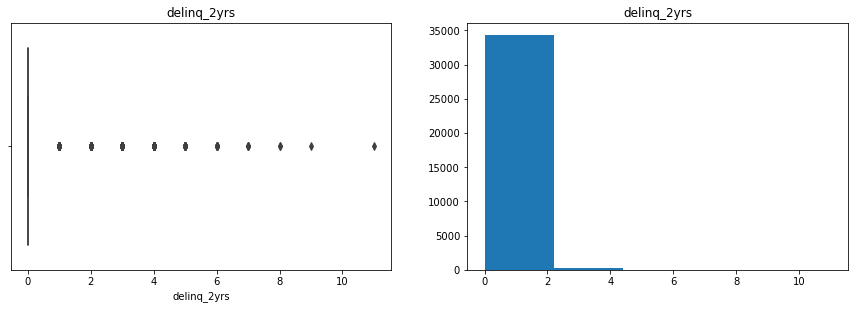

In [62]:
dataOverview(loandataframe,'delinq_2yrs')

In [63]:
loandataframe.delinq_2yrs.value_counts() # most of the value is in 0-1 range, also the outlier value is pretty small

0     30911
1      2874
2       591
3       192
4        56
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [64]:
tempdataFrame=pd.DataFrame(loandataframe) #saving for future refrecne


##### inq_last_6mths


Data for :inq_last_6mths
Describe Data: 
 count    34660.00
mean         0.86
std          1.06
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          8.00
Name: inq_last_6mths, dtype: float64
ValueCount Data: 
 (-0.009000000000000001, 1.6]    26473
(1.6, 3.2]                       7716
(3.2, 4.8]                        262
(4.8, 6.4]                        170
(6.4, 8.0]                         39
Name: inq_last_6mths, dtype: int64


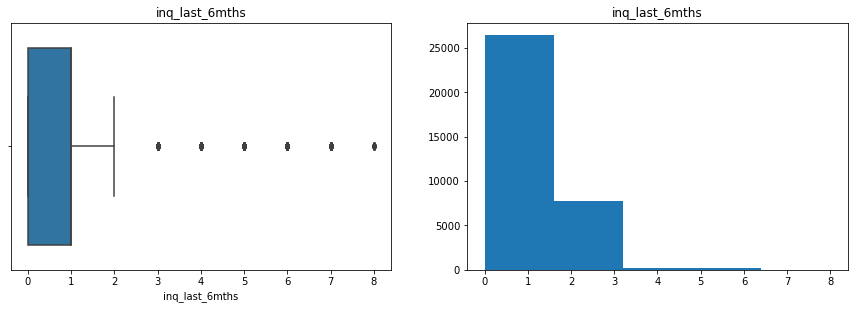

In [65]:
dataOverview(loandataframe,'inq_last_6mths')

In [66]:
print(loandataframe.inq_last_6mths.value_counts())
print(loandataframe[loandataframe.loan_status=='Charged Off'].inq_last_6mths.value_counts())
# based on this data Most of the person doesn't go for delienque

0    16870
1     9603
2     5060
3     2656
4      262
5      124
6       46
7       29
8       10
Name: inq_last_6mths, dtype: int64
0    2053
1    1496
2     843
3     554
4      43
5      21
6      13
7       9
8       3
Name: inq_last_6mths, dtype: int64


#### mths_since_last_delinq

Data for :mths_since_last_delinq
Describe Data: 
 count    34660.00
mean        12.82
std         21.68
min          0.00
25%          0.00
50%          0.00
75%         21.00
max        120.00
Name: mths_since_last_delinq, dtype: float64
ValueCount Data: 
 (-0.121, 24.0]    26683
(24.0, 48.0]       4471
(48.0, 72.0]       2616
(72.0, 96.0]        884
(96.0, 120.0]         6
Name: mths_since_last_delinq, dtype: int64


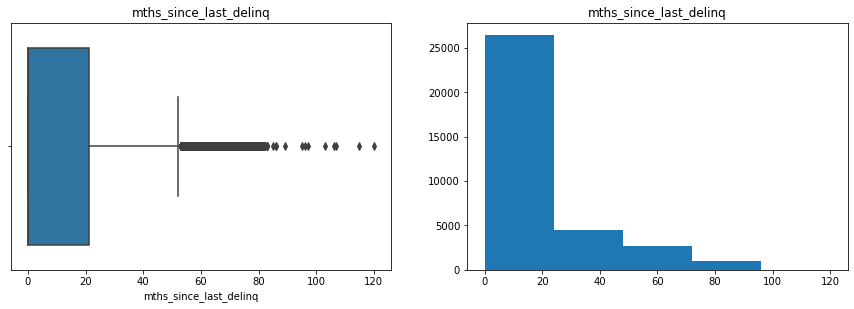

In [67]:
dataOverview(loandataframe,'mths_since_last_delinq')

In [68]:
print(loandataframe.mths_since_last_delinq.value_counts(bins=[0,5,10,20,30,40,50,60,80,90,100,110]))
print(loandataframe[loandataframe.loan_status=='Charged Off'].mths_since_last_delinq.value_counts(bins=[0,5,10,20,30,40,50,60,80,90,100,110]))

(-0.001, 5.0]     23221
(20.0, 30.0]       1951
(60.0, 80.0]       1943
(30.0, 40.0]       1902
(10.0, 20.0]       1836
(40.0, 50.0]       1687
(50.0, 60.0]       1167
(5.0, 10.0]         806
(80.0, 90.0]        139
(90.0, 100.0]         3
(100.0, 110.0]        3
Name: mths_since_last_delinq, dtype: int64
(-0.001, 5.0]     3242
(60.0, 80.0]       326
(10.0, 20.0]       304
(20.0, 30.0]       295
(40.0, 50.0]       272
(30.0, 40.0]       251
(50.0, 60.0]       176
(5.0, 10.0]        140
(80.0, 90.0]        27
(90.0, 100.0]        1
(100.0, 110.0]       1
Name: mths_since_last_delinq, dtype: int64


##### total_acc

Data for :total_acc
Describe Data: 
 count    34660.00
mean        21.31
std         11.15
min          2.00
25%         13.00
50%         20.00
75%         28.00
max         90.00
Name: total_acc, dtype: float64
ValueCount Data: 
 (1.911, 19.6]    17154
(19.6, 37.2]     14433
(37.2, 54.8]      2731
(54.8, 72.4]       331
(72.4, 90.0]        11
Name: total_acc, dtype: int64


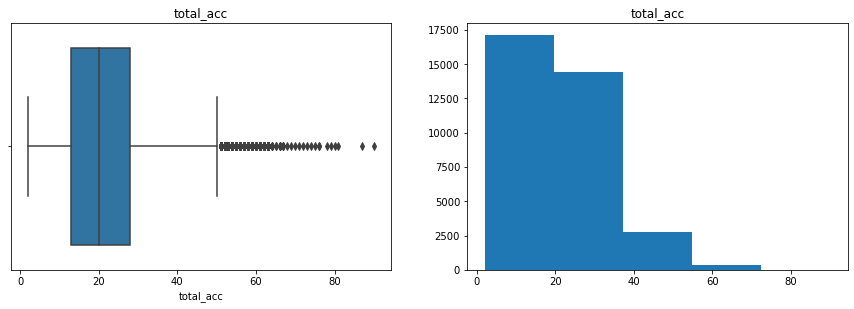

In [69]:
dataOverview(loandataframe,'total_acc')

In [70]:
# removing outlier from data
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_acc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)


Full data 
 ValueCount :
 (10.0, 15.0]     6387
(15.0, 20.0]     6355
(20.0, 25.0]     5568
(5.0, 10.0]      4561
(25.0, 30.0]     4077
(30.0, 35.0]     2731
(35.0, 40.0]     1755
(-0.001, 5.0]    1118
(40.0, 45.0]      949
(45.0, 50.0]      575
(50.0, 55.0]        0
(55.0, 60.0]        0
(60.0, 65.0]        0
(65.0, 70.0]        0
(70.0, 75.0]        0
(75.0, 80.0]        0
(80.0, 85.0]        0
(85.0, 90.0]        0
(90.0, 95.0]        0
Name: total_acc, dtype: int64
Charged off 
 ValueCount 
 (10.0, 15.0]     962
(15.0, 20.0]     908
(20.0, 25.0]     746
(5.0, 10.0]      740
(25.0, 30.0]     552
(30.0, 35.0]     363
(35.0, 40.0]     265
(-0.001, 5.0]    208
(40.0, 45.0]     148
(45.0, 50.0]      75
(50.0, 55.0]       0
(55.0, 60.0]       0
(60.0, 65.0]       0
(65.0, 70.0]       0
(70.0, 75.0]       0
(75.0, 80.0]       0
(80.0, 85.0]       0
(85.0, 90.0]       0
(90.0, 95.0]       0
Name: total_acc, dtype: int64


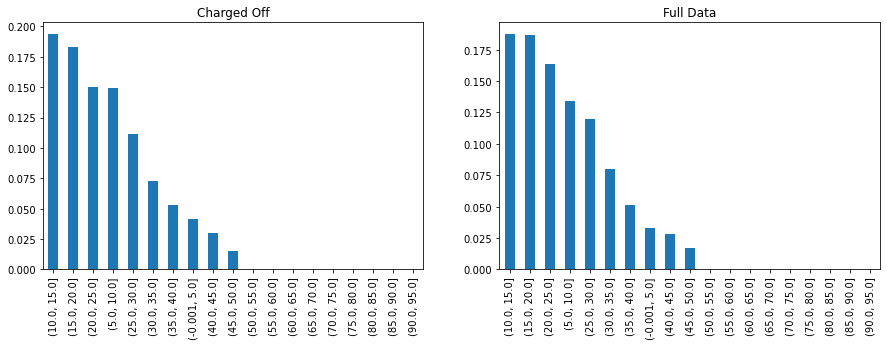

In [71]:
bin=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
dataAnalysis(loandataframe,'total_acc',bin)


### open_acc

Data for :open_acc
Describe Data: 
 count    34076.00
mean         8.95
std          4.15
min          2.00
25%          6.00
50%          8.00
75%         11.00
max         35.00
Name: open_acc, dtype: float64
ValueCount Data: 
 (1.9660000000000002, 8.6]    17718
(8.6, 15.2]                  13795
(15.2, 21.8]                  2289
(21.8, 28.4]                   259
(28.4, 35.0]                    15
Name: open_acc, dtype: int64


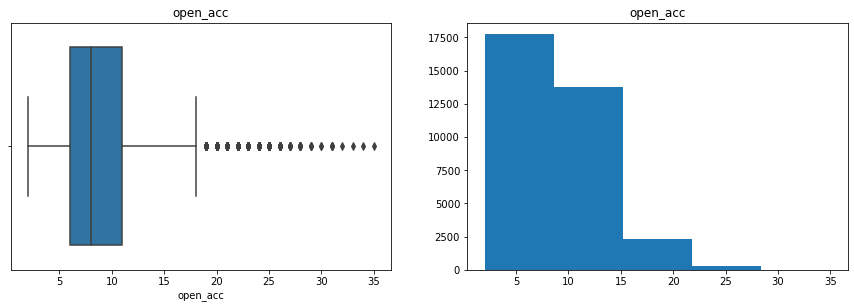

In [72]:
dataOverview(loandataframe,'open_acc')

In [73]:
# removing outlier from data
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.open_acc)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Full data 
 ValueCount :
 (5.0, 10.0]      16560
(10.0, 15.0]      7859
(-0.001, 5.0]     7094
(15.0, 20.0]      1657
(20.0, 25.0]         0
(25.0, 30.0]         0
(30.0, 35.0]         0
Name: open_acc, dtype: int64
Charged off 
 ValueCount 
 (5.0, 10.0]      2374
(10.0, 15.0]     1128
(-0.001, 5.0]    1108
(15.0, 20.0]      212
(20.0, 25.0]        0
(25.0, 30.0]        0
(30.0, 35.0]        0
Name: open_acc, dtype: int64


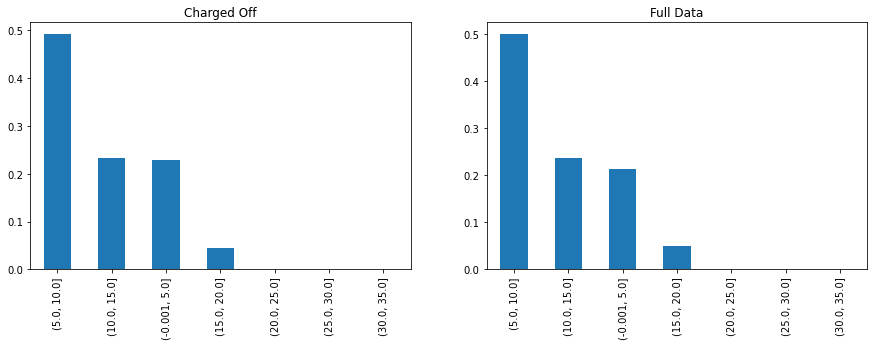

In [74]:
bin=[0,5,10,15,20,25,30,35]
dataAnalysis(loandataframe,'open_acc',bin)

##### out_prncp

Data for :out_prncp
Describe Data: 
 count    33170.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64
ValueCount Data: 
 (-0.0002, 0.0002]     33170
(-0.002, -0.0006]         0
(-0.0006, -0.0002]        0
(0.0002, 0.0006]          0
(0.0006, 0.001]           0
Name: out_prncp, dtype: int64


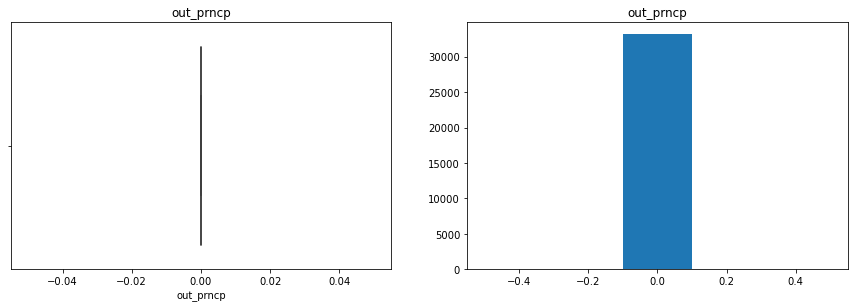

In [75]:
dataOverview(loandataframe,'out_prncp',5)
#data doesn't seems to be releavnt for processing

##### out_prncp_inv

Data for :out_prncp_inv
Describe Data: 
 count    33170.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64
ValueCount Data: 
 (-0.0001, 0.0]        33170
(-0.002, -0.0009]         0
(0.0001, 0.0002]          0
(0.0008, 0.0009]          0
(0.0007, 0.0008]          0
(0.0006, 0.0007]          0
(0.0005, 0.0006]          0
(0.0004, 0.0005]          0
(0.0003, 0.0004]          0
(0.0002, 0.0003]          0
(0.0, 0.0001]             0
(-0.0009, -0.0008]        0
(-0.0002, -0.0001]        0
(-0.0003, -0.0002]        0
(-0.0004, -0.0003]        0
(-0.0005, -0.0004]        0
(-0.0006, -0.0005]        0
(-0.0007, -0.0006]        0
(-0.0008, -0.0007]        0
(0.0009, 0.001]           0
Name: out_prncp_inv, dtype: int64


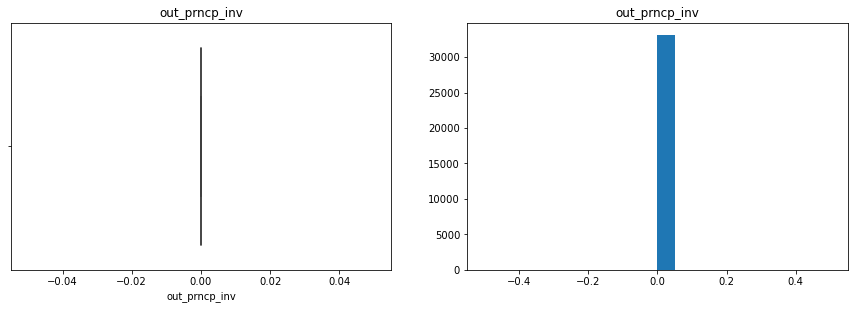

In [76]:
dataOverview(loandataframe,'out_prncp_inv',20)#data doesn't seems to be releavnt for processing

##### total_pymnt

Data for :total_pymnt
Describe Data: 
 count    33170.00
mean     10349.75
std       6916.22
min          0.00
25%       5178.42
50%       8847.20
75%      14249.61
max      41829.77
Name: total_pymnt, dtype: float64
ValueCount Data: 
 (-41.830999999999996, 8365.954]    15696
(8365.954, 16731.908]              11590
(16731.908, 25097.862]              4671
(25097.862, 33463.816]              1023
(33463.816, 41829.77]                190
Name: total_pymnt, dtype: int64


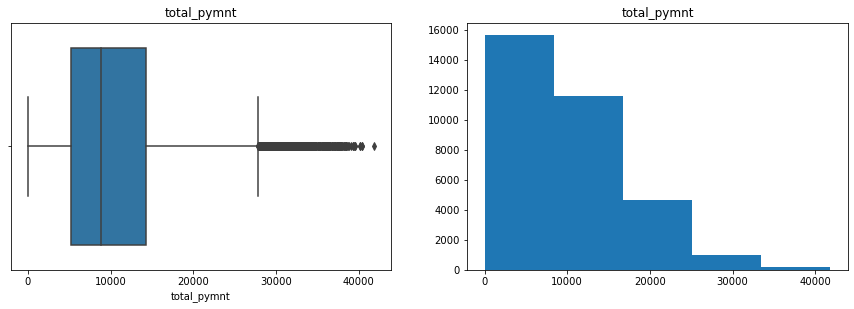

In [77]:
dataOverview(loandataframe,'total_pymnt')

In [78]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_pymnt)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :total_pymnt
Describe Data: 
 count    32514.00
mean      9914.83
std       6249.10
min          0.00
25%       5082.67
50%       8674.32
75%      13864.68
max      27854.24
Name: total_pymnt, dtype: float64
ValueCount Data: 
 (5570.848, 11141.696]     11160
(-27.855, 5570.848]        9302
(11141.696, 16712.544]     6806
(16712.544, 22283.392]     3602
(22283.392, 27854.24]      1644
Name: total_pymnt, dtype: int64


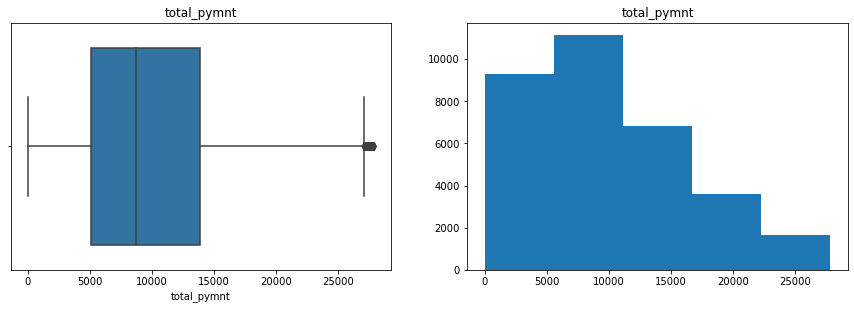

In [79]:
#verify if outlier is removed or not
dataOverview(loandataframe,'total_pymnt')

Full data 
 ValueCount :
 (5570.848, 8356.272]      6378
(2785.424, 5570.848]      5869
(8356.272, 11141.696]     4782
(11141.696, 13927.12]     4016
(-27.855, 2785.424]       3433
(13927.12, 16712.544]     2790
(16712.544, 19497.968]    2218
(19497.968, 22283.392]    1384
(22283.392, 25068.816]    1085
(25068.816, 27854.24]      559
Name: total_pymnt, dtype: int64
Charged off 
 ValueCount 
 (-27.714000000000002, 2771.253]    1655
(2771.253, 5542.506]               1251
(5542.506, 8313.759]                762
(8313.759, 11085.012]               466
(11085.012, 13856.265]              256
(13856.265, 16627.518]              182
(16627.518, 19398.771]              105
(19398.771, 22170.024]               66
(22170.024, 24941.277]               35
(24941.277, 27712.53]                22
Name: total_pymnt, dtype: int64


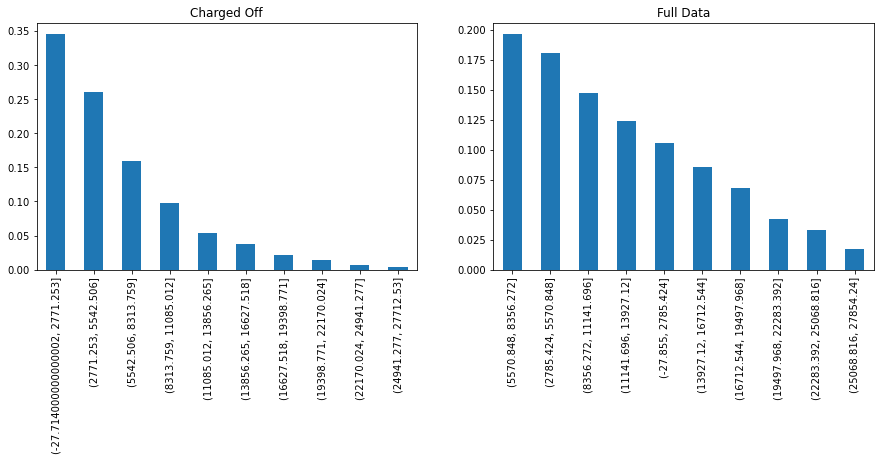

In [80]:
bin=10 
# analyzing the data based on it inference will be deducted 
dataAnalysis(loandataframe,'total_pymnt',10)

##### total_pymnt_inv

Data for :total_pymnt_inv
Describe Data: 
 count    32514.00
mean      9413.43
std       6202.63
min          0.00
25%       4617.00
50%       8132.22
75%      13279.05
max      27779.71
Name: total_pymnt_inv, dtype: float64
ValueCount Data: 
 (5555.942, 11111.884]              11005
(-27.781000000000002, 5555.942]    10343
(11111.884, 16667.826]              6442
(16667.826, 22223.768]              3303
(22223.768, 27779.71]               1421
Name: total_pymnt_inv, dtype: int64


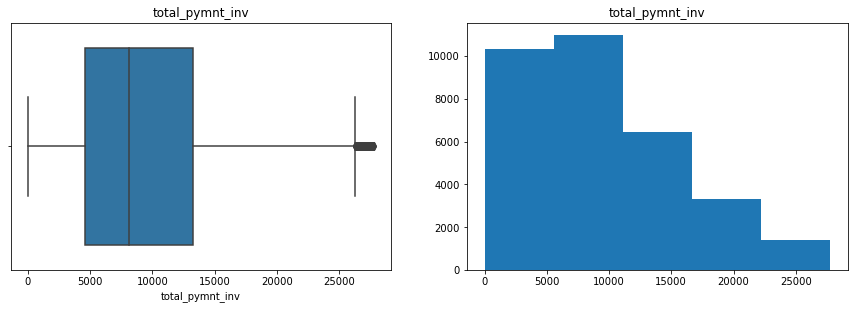

In [81]:

dataOverview(loandataframe,'total_pymnt_inv')

##### total_rec_prncp

Data for :total_rec_prncp
Describe Data: 
 count    32514.00
mean      8184.79
std       5213.28
min          0.00
25%       4000.00
50%       7200.00
75%      12000.00
max      26000.00
Name: total_rec_prncp, dtype: float64
ValueCount Data: 
 (3900.0, 5200.0]      4343
(5200.0, 6500.0]      3229
(9100.0, 10400.0]     3169
(1300.0, 2600.0]      2823
(2600.0, 3900.0]      2721
(7800.0, 9100.0]      2677
(11700.0, 13000.0]    2526
(6500.0, 7800.0]      2297
(14300.0, 15600.0]    1866
(-26.001, 1300.0]     1808
(10400.0, 11700.0]     997
(19500.0, 20800.0]     952
(13000.0, 14300.0]     911
(15600.0, 16900.0]     820
(16900.0, 18200.0]     734
(18200.0, 19500.0]     256
(20800.0, 22100.0]     234
(23400.0, 24700.0]      66
(22100.0, 23400.0]      49
(24700.0, 26000.0]      36
Name: total_rec_prncp, dtype: int64


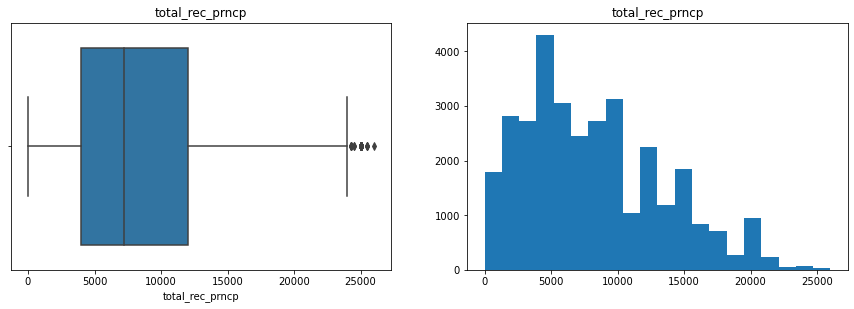

In [82]:
dataOverview(loandataframe,'total_rec_prncp',20)

##### total_rec_int

Data for :total_rec_int
Describe Data: 
 count    32514.00
mean      1648.48
std       1545.47
min          0.00
25%        587.53
50%       1152.72
75%       2199.98
max      13482.63
Name: total_rec_int, dtype: float64
ValueCount Data: 
 (-13.484, 2696.526]      26597
(2696.526, 5393.052]      4733
(5393.052, 8089.578]      1014
(8089.578, 10786.104]      159
(10786.104, 13482.63]       11
Name: total_rec_int, dtype: int64


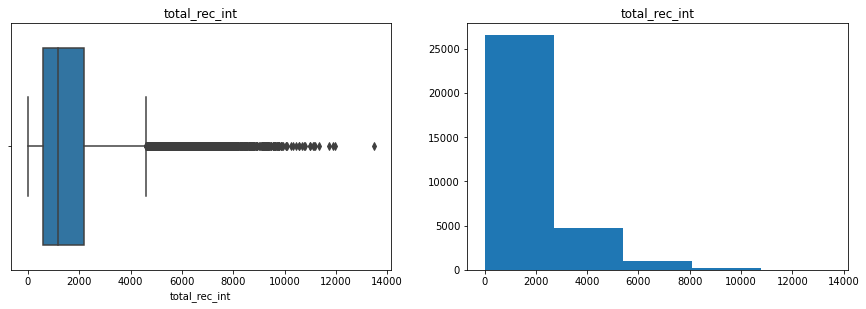

In [83]:
dataOverview(loandataframe,'total_rec_int')

In [84]:
#removing outlier from the data 
outlierindex=[]
loandataframe.reset_index(inplace=True,drop=True)
outlierindex=findremout(loandataframe.total_rec_int)
if len(outlierindex[0][0])>0:
    loandataframe.drop(outlierindex[0][0],inplace=True)
if len(outlierindex[1][0])>0:
    loandataframe.drop(outlierindex[1][0],inplace=True)

Data for :total_rec_int
Describe Data: 
 count    30629.00
mean      1372.37
std       1054.82
min          0.00
25%        559.30
50%       1075.78
75%       1939.72
max       4618.05
Name: total_rec_int, dtype: float64
ValueCount Data: 
 (-4.619000000000001, 923.61]    13306
(923.61, 1847.22]                9070
(1847.22, 2770.83]               4488
(2770.83, 3694.44]               2388
(3694.44, 4618.05]               1377
Name: total_rec_int, dtype: int64


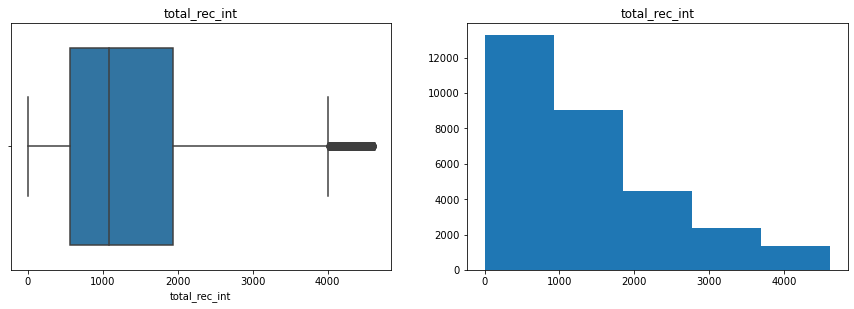

In [85]:
# Verify if outlier is removed 
dataOverview(loandataframe,'total_rec_int')

##### total_rec_late_fee

Data for :total_rec_late_fee
Describe Data: 
 count    30629.00
mean         1.21
std          6.35
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        165.69
Name: total_rec_late_fee, dtype: float64
ValueCount Data: 
 (-0.167, 33.138]     30413
(33.138, 66.276]       171
(66.276, 99.414]        34
(99.414, 132.552]        9
(132.552, 165.69]        2
Name: total_rec_late_fee, dtype: int64


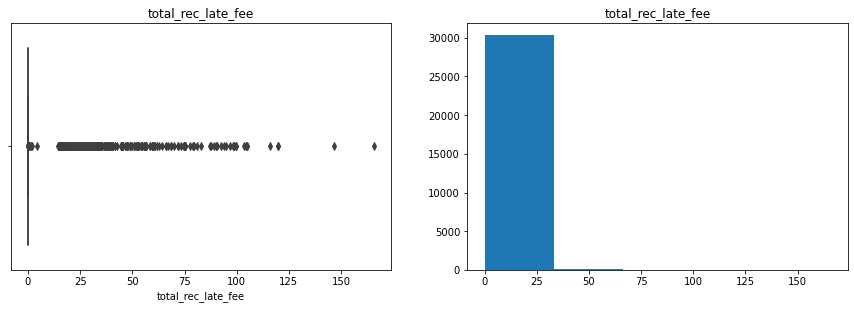

In [86]:
dataOverview(loandataframe,'total_rec_late_fee')
# mostly value is zero and can be used for further analysis

##### Analyzing catogorical data
1. Term

In [87]:
fpdf=loandataframe[loandataframe.loan_status=='Fully Paid']
codf=loandataframe[loandataframe.loan_status=='Charged Off']

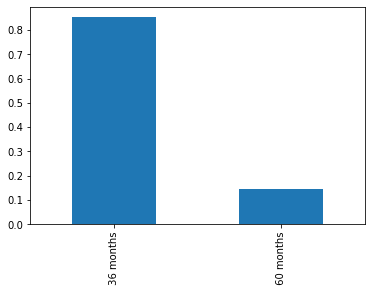

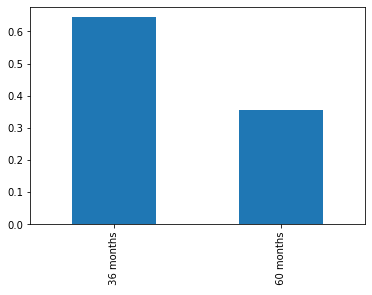

<function matplotlib.pyplot.show(close=None, block=None)>

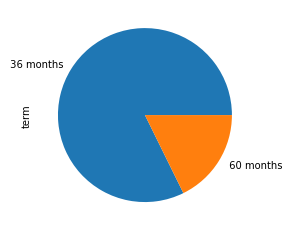

In [88]:
#plt.bar(fpdf.term.value_counts(normalize=True))
fpdf.term.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.term.value_counts(normalize=True).plot(kind='bar')
plt.show()
loandataframe.term.value_counts(normalize=True).plot(kind='pie')
plt.show
# 80% of the loan have 36 months term. However there is a strange pattern , With charge-off mostly people try to get loan term more compared to fully paid

2. Grade

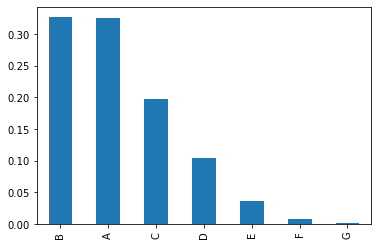

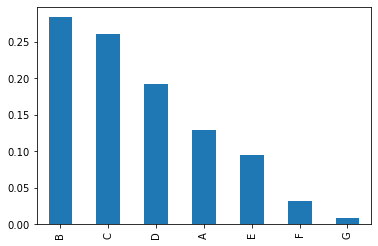

<function matplotlib.pyplot.show(close=None, block=None)>

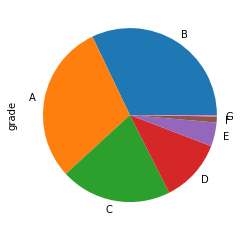

In [89]:
fpdf.grade.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.grade.value_counts(normalize=True).plot(kind='bar')
plt.show()
loandataframe.grade.value_counts(normalize=True).plot(kind='pie')
plt.show
# 70% of charged-off loan which belongs to B,C,D grade and suggested that grade category D might be a risky 

3. emp_title

In [90]:
print('Fully paid \n',fpdf.emp_title.value_counts()) # Distint employee title 
print("Charged Off \n",codf.emp_title.value_counts()) # no inference can be made , this column can be deleted

Fully paid 
 undisclosed                     1519
US Army                           86
Bank of America                   67
US Air Force                      39
Wells Fargo                       37
                                ... 
Aztec Facility Services            1
Florida Department of Health       1
State Farm insurance               1
Ball Chatham School Dist           1
Evergreen Center                   1
Name: emp_title, Length: 19838, dtype: int64
Charged Off 
 undisclosed                                                  398
Bank of America                                               17
US Army                                                       13
Walmart                                                       13
UPS                                                            8
AT&T                                                           8
Kaiser Permanente                                              7
U.S. Army                                                      6
U

In [91]:
len(set(loandataframe.emp_title))# unique 24319 emp title grouping them to a single employment would be difficult and doesn't provide a good insight

22878

4. emp_length

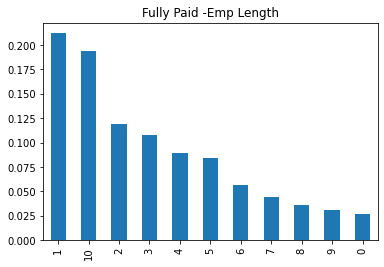

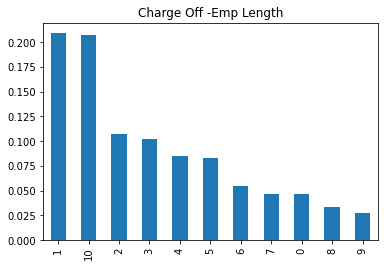

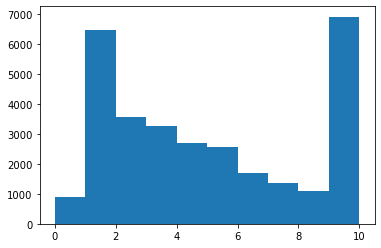

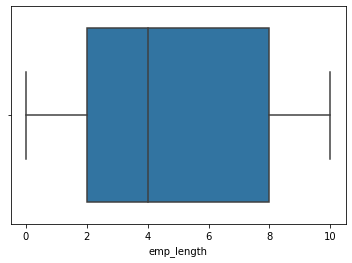

In [92]:
fpdf.emp_length.value_counts(normalize=True).plot(kind='bar')
plt.title('Fully Paid -Emp Length')
plt.show()
plt.title('Charge Off -Emp Length')
codf.emp_length.value_counts(normalize=True).plot(kind='bar')
plt.show()
plt.hist(loandataframe.emp_length,bins=10)
plt.show()
sns.boxplot(loandataframe.emp_length)
plt.show()
# nothing can be infered from here as employee length  doesn't seems to have any impact 

5. Home ownership

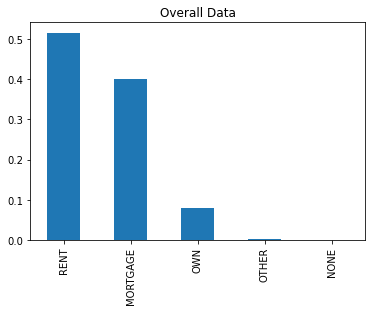

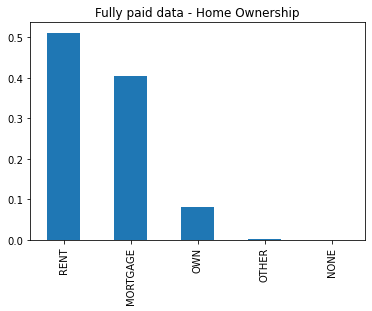

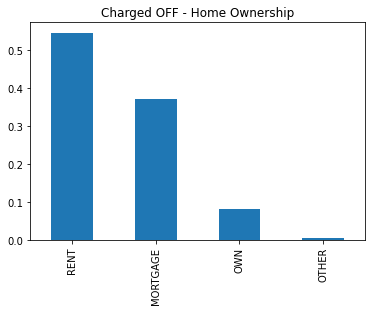

In [93]:
loandataframe.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.title('Overall Data')
plt.show()
fpdf.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.title('Fully paid data - Home Ownership')
plt.show()
plt.title ('Charged OFF - Home Ownership')
codf.home_ownership.value_counts(normalize=True).plot(kind='bar')
plt.show()
# Home Ownership as Rent have maximum number of loan and as well Charge off

6. issue_d,
issue_m (Derived metrices),
issue_y (Derived metrices)

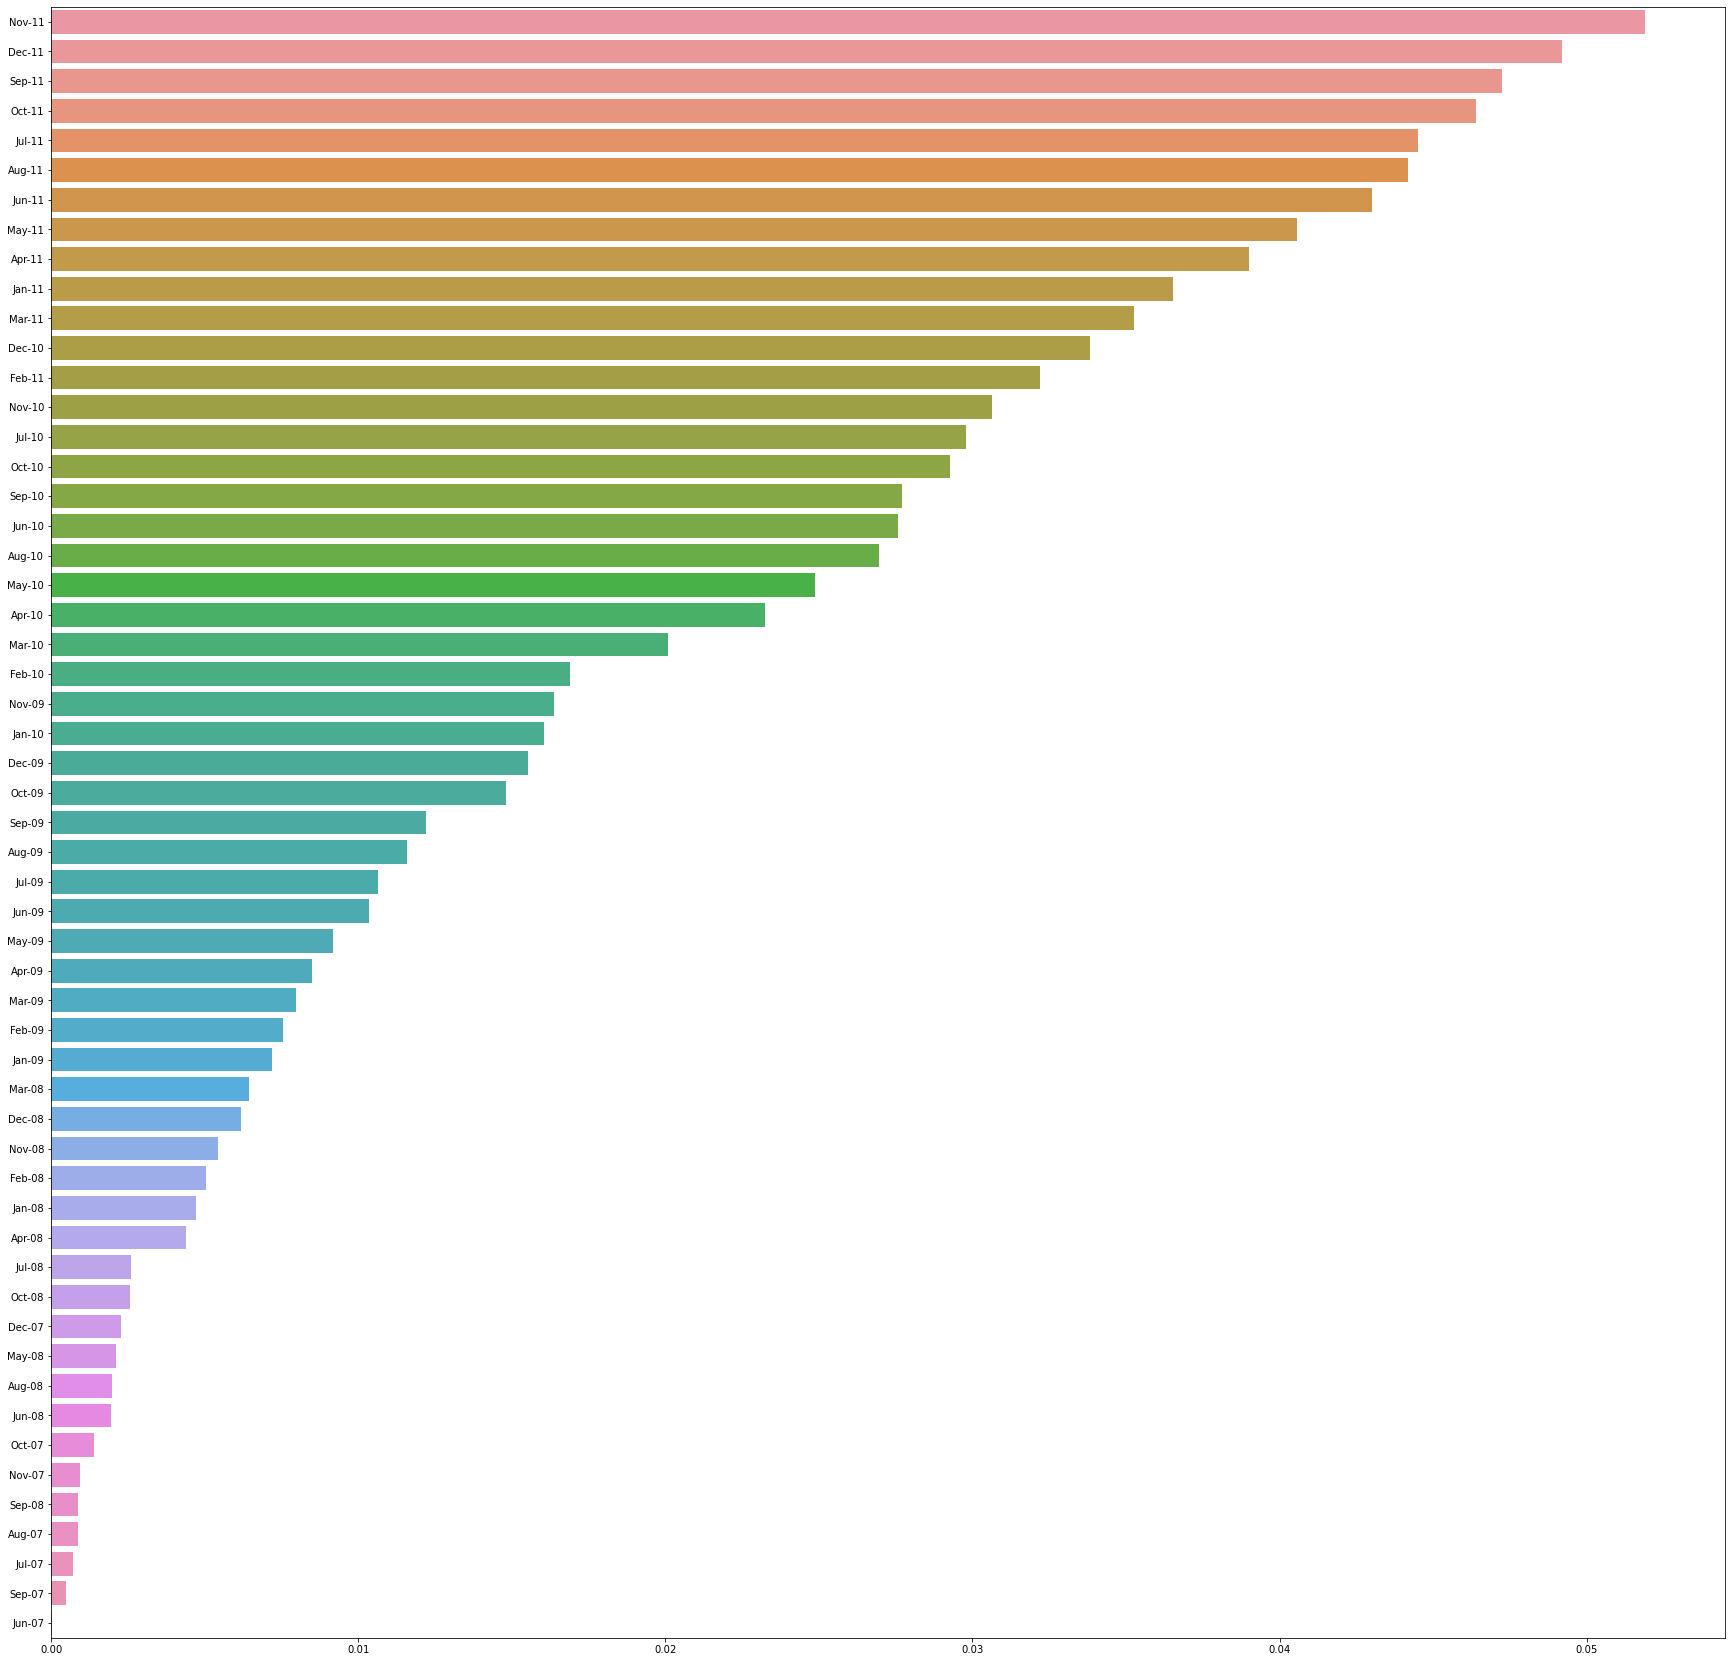

In [94]:
issuedate=loandataframe.issue_d.value_counts(normalize=True)
#fig,ax=plt.subplots(figsize=(13,7))
plt.figure(figsize=(30,30))
sns.barplot(x=issuedate.values,y=issuedate.keys())
plt.show()

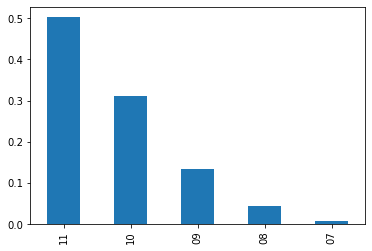

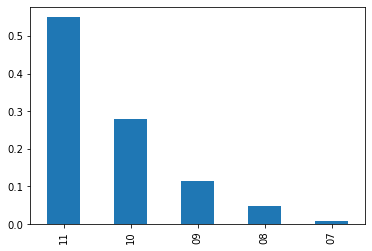

In [95]:
fpdf.issue_y.value_counts(normalize=True).plot(kind='bar')

plt.show()
codf.issue_y.value_counts(normalize=True).plot(kind='bar')
plt.show()
# 50% of loan was issued in the 2011 follwed by 30% in 2010.
# over the year banks has increases the loan from 07 to 2011( exposure is higher in 2011)
# charged of loan happens mostly in 2011

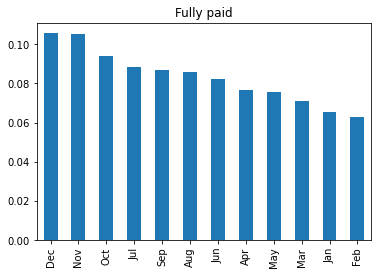

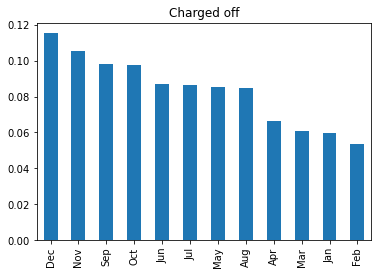

In [96]:
fpdf.issue_m.value_counts(normalize=True).plot(kind='bar')
plt.title("Fully paid")
plt.show()
codf.issue_m.value_counts(normalize=True).plot(kind='bar')
plt.title("Charged off")
plt.show()
# irrespective of Year, it seems the loan which is issued at end of year have dec have most charged-off and risky

#irrespective of year loan is distributes across each an every month with more or less same value, However most of the defaults happen for the loan provided for the month of december 

loan_status

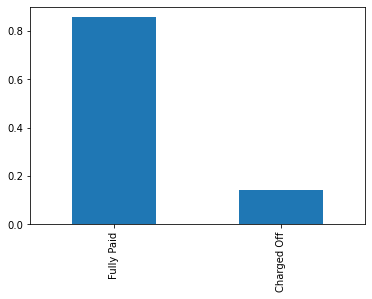

Fully Paid     0.857325
Charged Off    0.142675
Name: loan_status, dtype: float64

In [97]:
loandataframe.loan_status.value_counts(normalize=True).plot(kind='bar')
plt.show()
#84% of people have paid there loan, while 14% are charged off
loandataframe.loan_status.value_counts(normalize=True)

7. Purpose

debt_consolidation    0.450717
credit_card           0.131248
other                 0.110092
home_improvement      0.068530
major_purchase        0.060988
car                   0.044206
small_business        0.040713
wedding               0.026021
medical               0.018675
moving                0.016553
vacation              0.011133
educational           0.009501
house                 0.009011
renewable_energy      0.002612
Name: purpose, dtype: float64


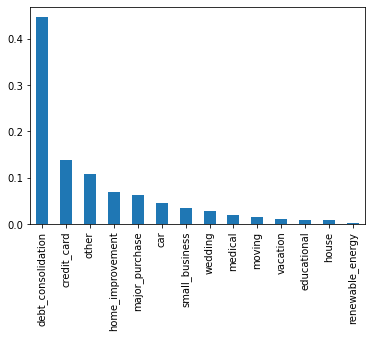

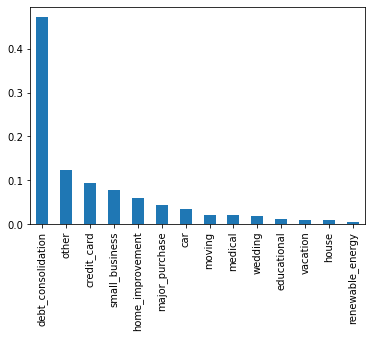

In [98]:
print(loandataframe.purpose.value_counts(normalize=True))
fpdf.purpose.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.purpose.value_counts(normalize=True).plot(kind='bar')
plt.show()


#45% of loans are taken to pay off multiple debts, which means debt_consolidation, crditcard payment and others are main contributer and also leads to chargeoff 

8. addr_state

CA    0.204577
FL    0.092906
NY    0.086270
TX    0.050114
NJ    0.045995
GA    0.038902
IL    0.035240
PA    0.030892
VA    0.029291
MA    0.028604
OH    0.028375
MD    0.027231
MO    0.023570
AZ    0.022654
WA    0.021968
NC    0.021281
NV    0.018535
MI    0.018307
CT    0.017391
CO    0.016934
MN    0.015103
OR    0.013043
SC    0.011899
WI    0.010526
LA    0.010069
AL    0.009382
KY    0.008696
OK    0.008009
NM    0.005492
HI    0.005492
UT    0.005263
KS    0.005263
AR    0.004805
NH    0.004805
RI    0.004348
WV    0.003890
DC    0.002517
SD    0.002288
DE    0.002288
AK    0.002059
MT    0.002059
VT    0.001144
WY    0.000686
NE    0.000686
MS    0.000458
TN    0.000458
ID    0.000229
Name: addr_state, dtype: float64


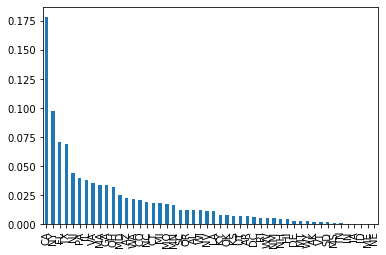

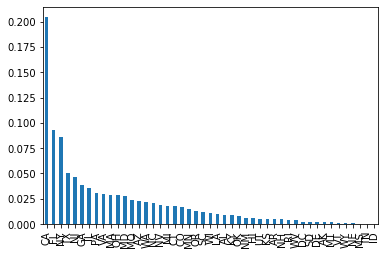

In [99]:
print(codf.addr_state.value_counts(normalize=True))
fpdf.addr_state.value_counts(normalize=True).plot(kind='bar')
plt.show()
codf.addr_state.value_counts(normalize=True).plot(kind='bar')
plt.show()
# Calafornia state have maximum 17% of loan accounts and also 20% default as well.

verification_status

<AxesSubplot:>

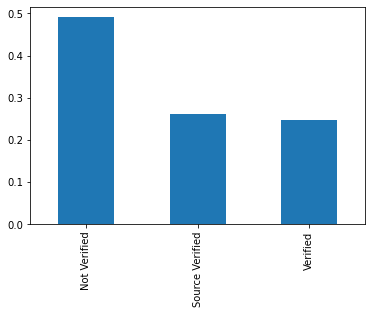

In [100]:
loandataframe.verification_status.value_counts(normalize=True).plot(kind='bar')

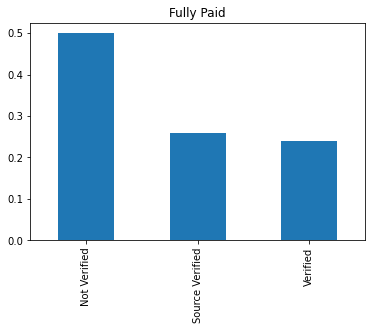

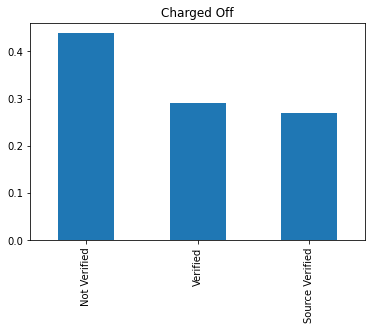

In [101]:
fpdf.verification_status.value_counts(normalize=True).plot(kind='bar')
plt.title("Fully Paid")
plt.show()
codf.verification_status.value_counts(normalize=True).plot(kind='bar')
plt.title("Charged Off")
plt.show()

# Observation based on univarate analysis for each associated variable. 
### There chance of defaulting is more when :
*  "Loan_amount" or "funded_amount_inv" in 5000 to 10000 range.
*  Interest rates are heigher than 14% mainly 14-20%
*  Installment range in between 100 -200
*  Anuual income in range between 30k to 60K
*  DTI value in range of 12-16
*  Applicant who have 5-10 Accounts.
*  Applicant who select 36 months of loan term, however the number are high for Fully paid as well.
*  Grade is B & C
*  Applicant with employee length 10 Or 1
*  Applicant with home ownership as Rent
*  Loan issued at year end mostly in the month of DEC
*  Purpose is to debt_consolidation & Credit card payment
*  Loan issued to people from CA state.
*  Verification status is not verified



# Bivariate Analysis

Find the corelation between different variable and see how these variable are linked to each other

In [102]:
def pivotHeatmapAnalysis(dataframe,indexname,columnname,value,nx):
    pivotTable=pd.pivot_table(data=dataframe,values=value,index=indexname,columns=columnname, aggfunc=np.sum)
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    sns.barplot(data=dataframe,x=nx[0],y=nx[1])
    plt.subplot(222)
    sns.heatmap(pivotTable, cmap='coolwarm', annot=True,fmt='d')
    

In [103]:
corr=loandataframe[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','emp_length','open_acc']].corr()

In [104]:
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,emp_length,open_acc
loan_amnt,1.000000,0.975843,0.911234,0.098479,0.926252,0.321477,0.067970,0.218763,0.843420,0.791166,0.808429,0.121587,0.170291
funded_amnt,0.975843,1.000000,0.936447,0.109234,0.959892,0.317092,0.066943,0.212035,0.866291,0.815120,0.831278,0.122260,0.166929
funded_amnt_inv,0.911234,0.936447,1.000000,0.098699,0.887213,0.301191,0.075701,0.209765,0.823038,0.880267,0.790016,0.131781,0.157237
int_rate,0.098479,0.109234,0.098699,1.000000,0.108834,-0.047307,0.080408,-0.165364,0.056834,0.050404,-0.032149,-0.038422,-0.107258
installment,0.926252,0.959892,0.887213,0.108834,1.000000,0.313206,0.061345,0.181629,0.856187,0.795834,0.832178,0.098757,0.155210
annual_inc,0.321477,0.317092,0.301191,-0.047307,0.313206,1.000000,-0.098423,0.380793,0.310350,0.296146,0.312607,0.208917,0.257713
dti,0.067970,0.066943,0.075701,0.080408,0.061345,-0.098423,1.000000,0.233056,0.050096,0.058185,0.032378,0.048326,0.298724
total_acc,0.218763,0.212035,0.209765,-0.165364,0.181629,0.380793,0.233056,1.000000,0.184237,0.182992,0.192318,0.206121,0.640100
total_pymnt,0.843420,0.866291,0.823038,0.056834,0.856187,0.310350,0.050096,0.184237,1.000000,0.947680,0.983347,0.100644,0.150519
total_pymnt_inv,0.791166,0.815120,0.880267,0.050404,0.795834,0.296146,0.058185,0.182992,0.947680,1.000000,0.931844,0.112094,0.142321


Text(0.5, 1.0, 'Corelation')

<Figure size 1440x2160 with 0 Axes>

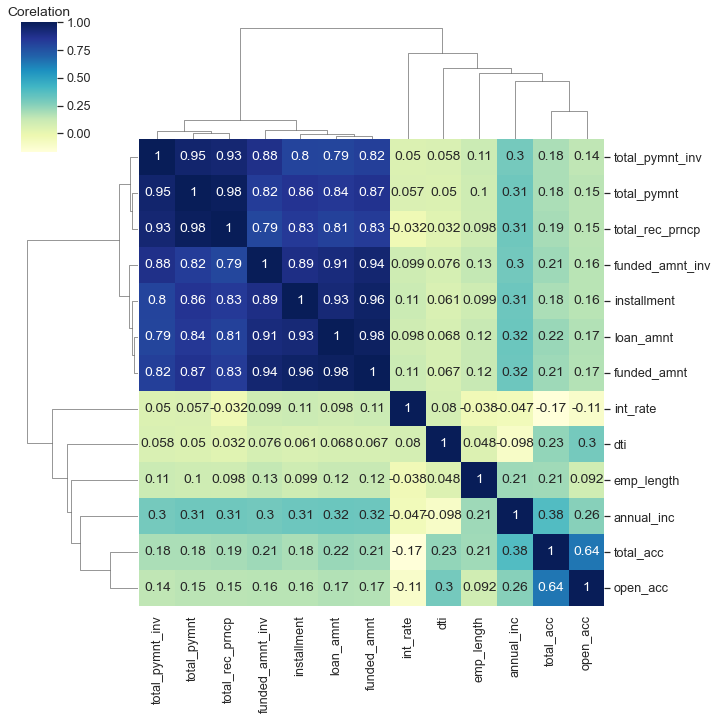

In [105]:
sns.set(font_scale=1.15)
plt.figure(figsize=(20,30))
sns.clustermap(corr,square=True,annot=True,cmap='YlGnBu')
plt.title('Corelation')

In [106]:
#Grouping the amount so that it can be easily comparable
loandataframe['loan_amt_gp']=pd.cut(loandataframe['loan_amnt'],[0,500,5500,10000,15000,25000,35000],labels=['0-500','500-5.5k','5.5K-10K','10k-15k','15k-25k','25k-35k'])


In [107]:
loandataframe['int_rate_gp']=pd.cut(loandataframe['int_rate'],[0,2,4,8,10,12,14,20,24],labels=['0-2%','2%-4%','4%-8%','8%-10%','10%-12%','12%-14%','14%-20%','20%-24%'])



In [108]:
loandataframe['annual_inc_gp']=pd.cut(loandataframe['annual_inc'],[4000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000],labels=['4k-10K','10k-20k','20K-30K','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-120k','120k-140k'])

In [109]:
#bins=[15,50,100,200,300,400,500,600,700,800]
loandataframe['installment_gp']=pd.cut(loandataframe['installment'],[15,50,100,200,300,400,500,600,700,800],labels=['15-50','50-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800'])

In [110]:
print(loandataframe['int_rate_gp'].value_counts())
print(loandataframe['annual_inc_gp'].value_counts())

4%-8%      7465
10%-12%    6987
14%-20%    6412
12%-14%    5901
8%-10%     3660
20%-24%     203
0-2%          0
2%-4%         0
Name: int_rate_gp, dtype: int64
40k-50k      5087
30k-40k      4825
50k-60k      4739
60k-70k      3325
20K-30K      3278
70k-80k      2717
80k-90k      1848
100k-120k    1575
90k-100k     1441
10k-20k      1074
120k-140k     623
4k-10K         96
Name: annual_inc_gp, dtype: int64


Based on the above graph
loanamount is +ve corelated with - funded_amt, fundend_amt_invest , installments , total_payment

## 1. LoanAmount 
#### LoanAmount Vs Interest rate

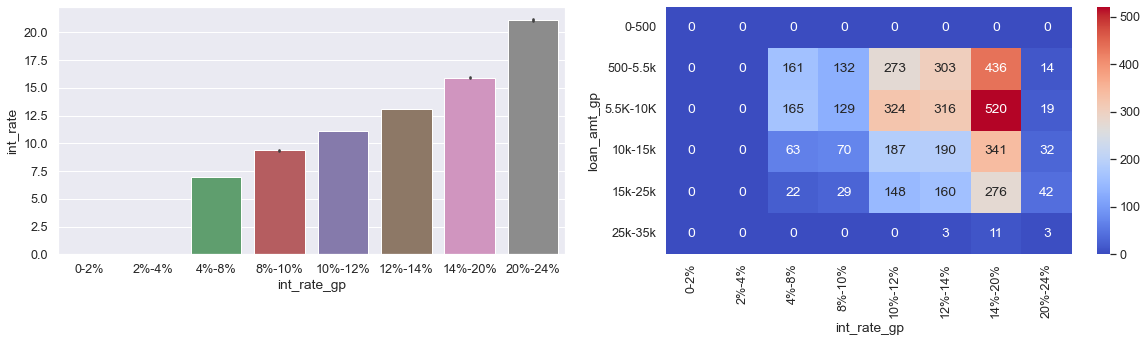

In [111]:
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','int_rate_gp','loan_status_int',['int_rate_gp','int_rate'])

 #### LoanAmount vs (installment, grade,emp_length, home_ownership,issue_m,issue_y, Verification) on loan_status

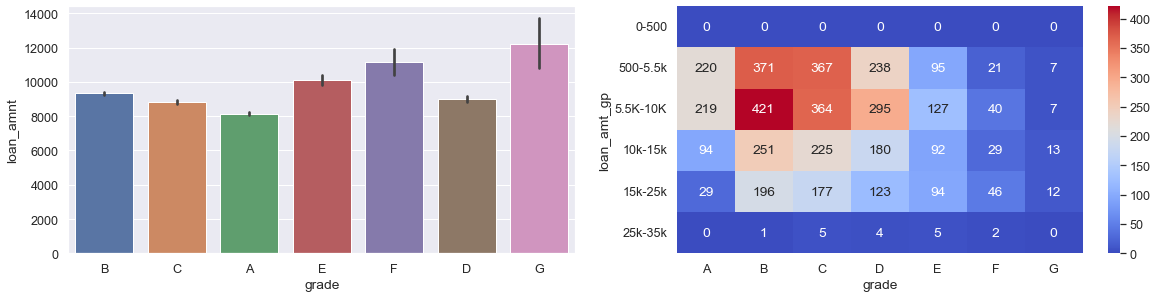

In [112]:
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','grade','loan_status_int',['grade','loan_amnt'])


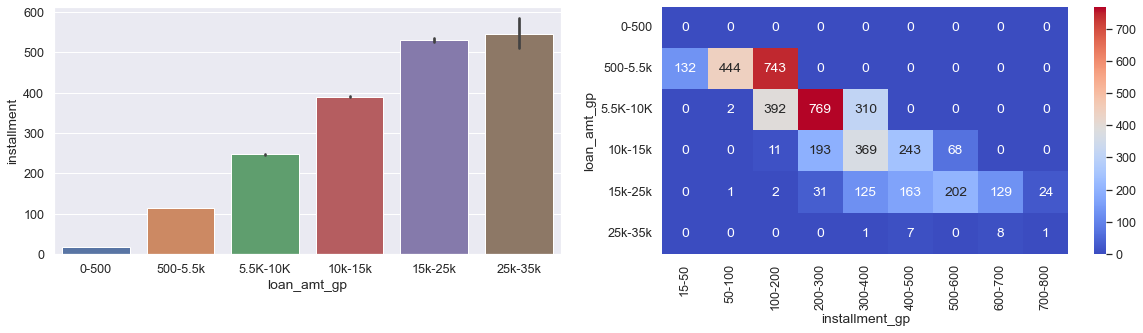

In [113]:
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','installment_gp','loan_status_int',['loan_amt_gp','installment'])

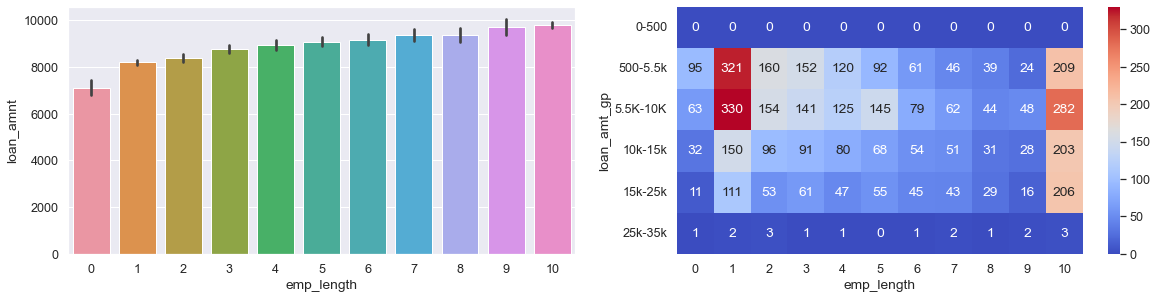

In [114]:
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','emp_length','loan_status_int',['emp_length','loan_amnt'])


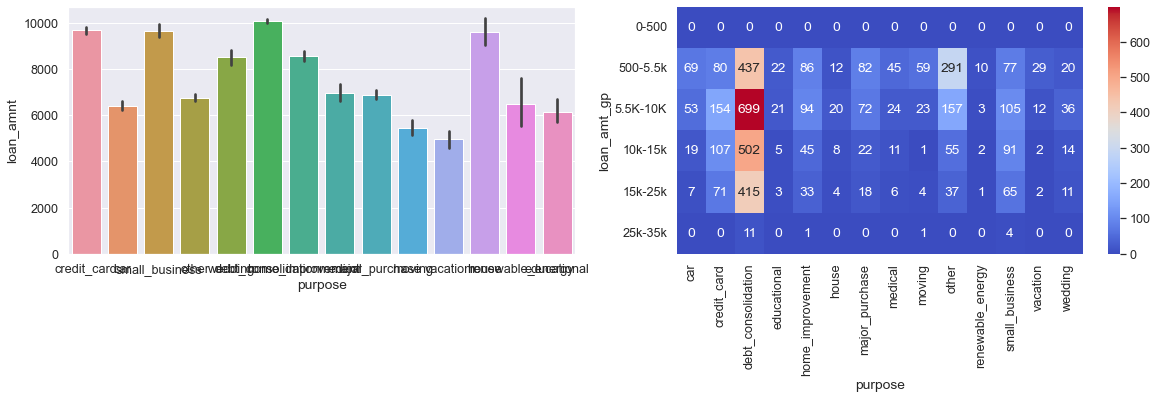

In [115]:
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','purpose','loan_status_int',['purpose','loan_amnt'])

<AxesSubplot:xlabel='issue_y', ylabel='loan_amnt'>

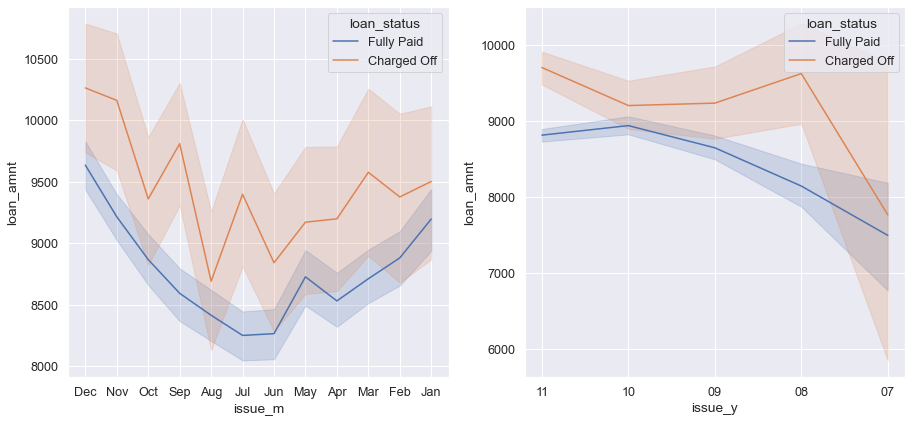

In [116]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.lineplot(data=loandataframe[['loan_amnt','issue_m','loan_status']],x='issue_m',y='loan_amnt',hue='loan_status')
plt.subplot(222)
sns.lineplot(data=loandataframe[['loan_amnt','issue_y','loan_status']],x='issue_y',y='loan_amnt',hue='loan_status')

#### LoanAmount vs (addr_state) on loan_status

<AxesSubplot:xlabel='addr_state', ylabel='loan_amt_gp'>

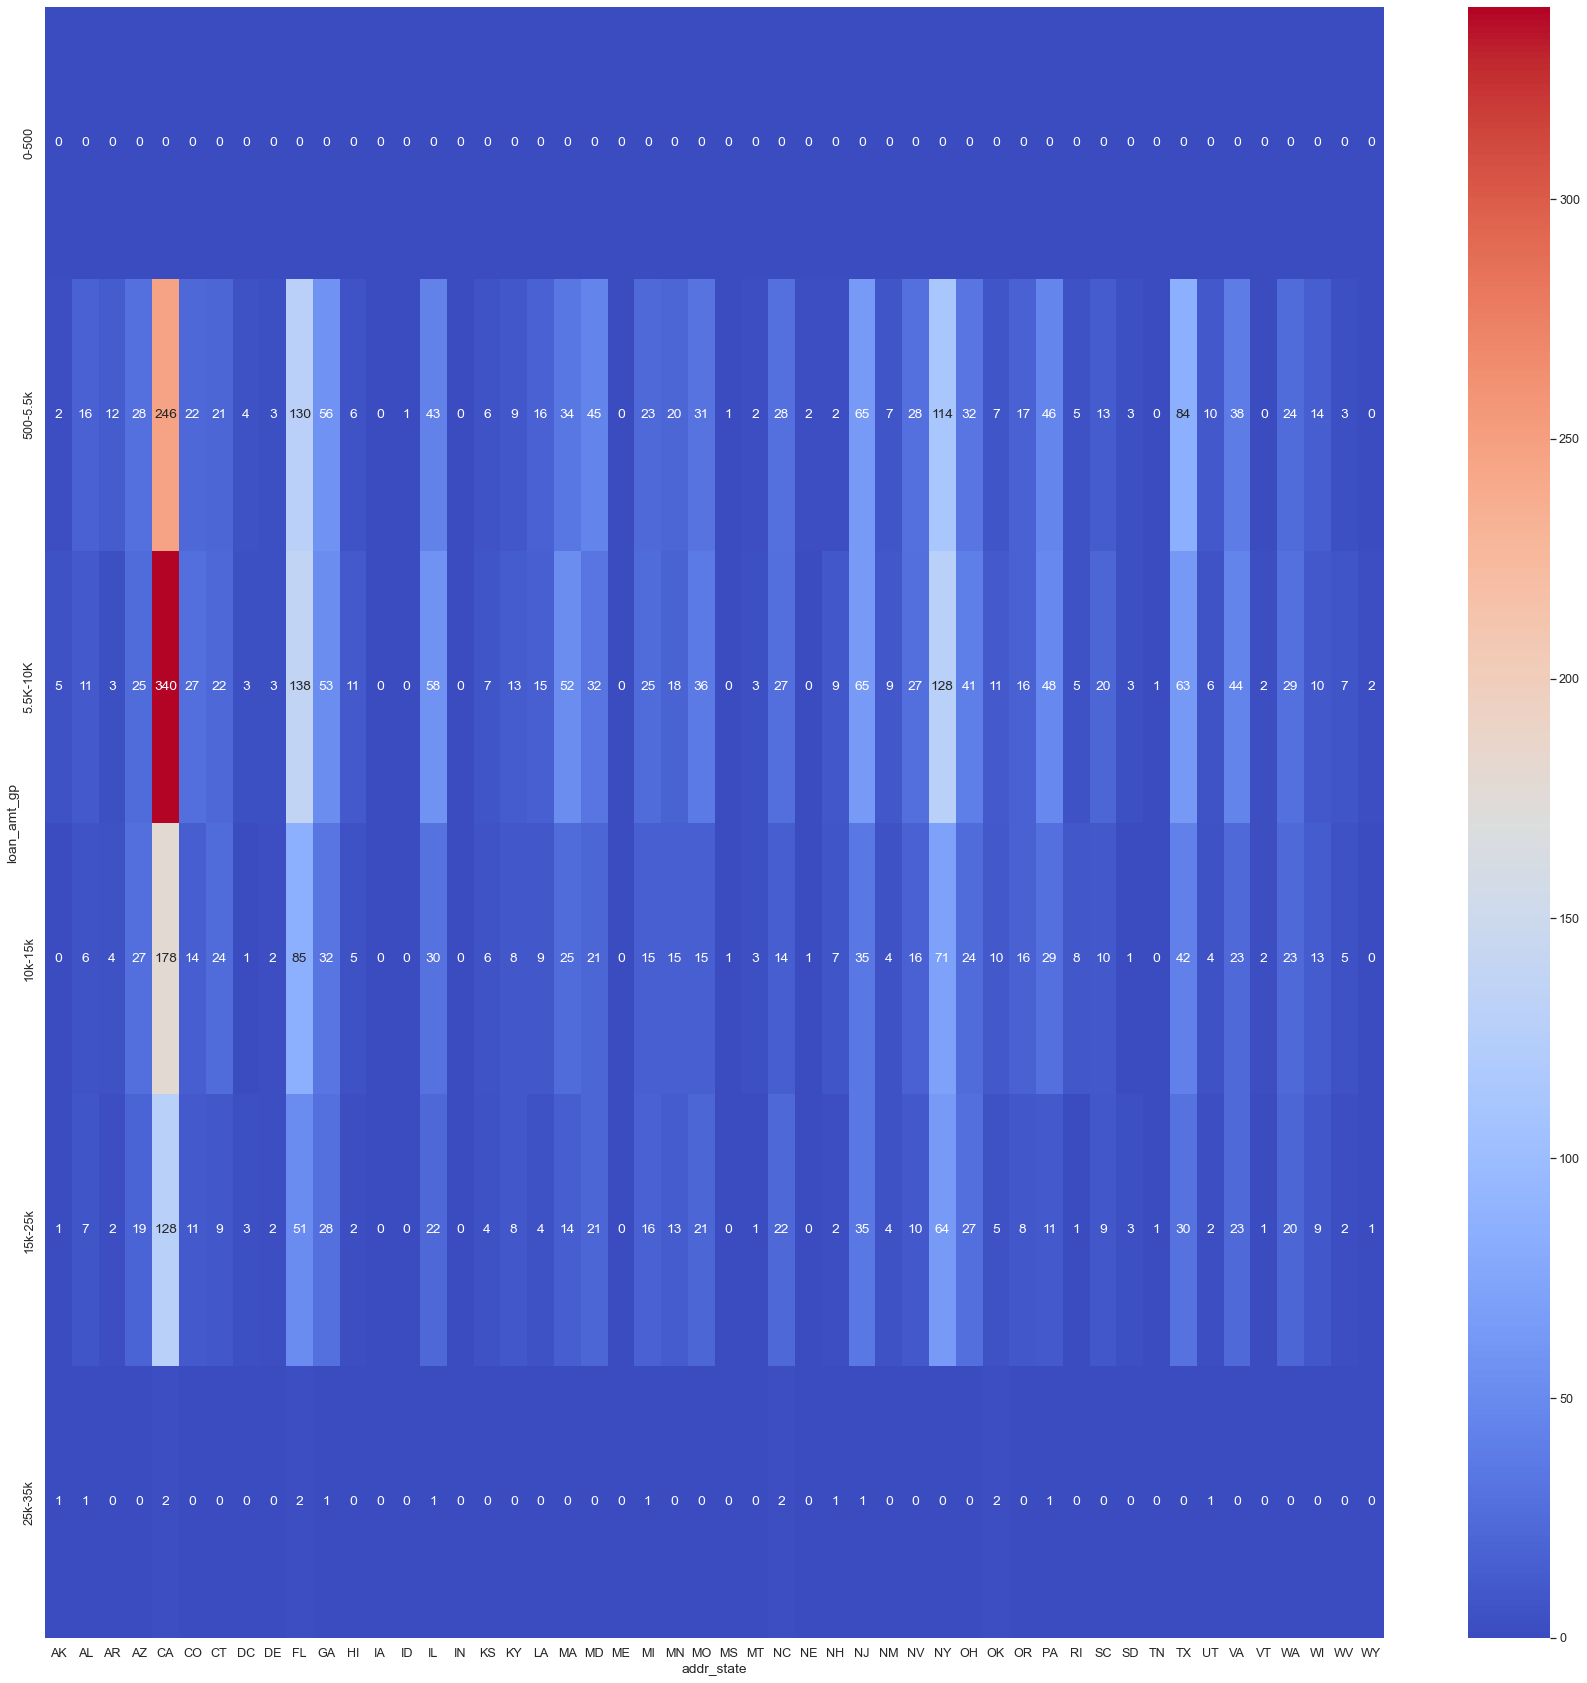

In [117]:
pt_addrs=pd.pivot_table(data=loandataframe,values='loan_status_int',index='loan_amt_gp',columns='addr_state', aggfunc=np.sum)
plt.figure(figsize=(30,30))
sns.heatmap(pt_addrs, cmap='coolwarm', annot=True,fmt='d')

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

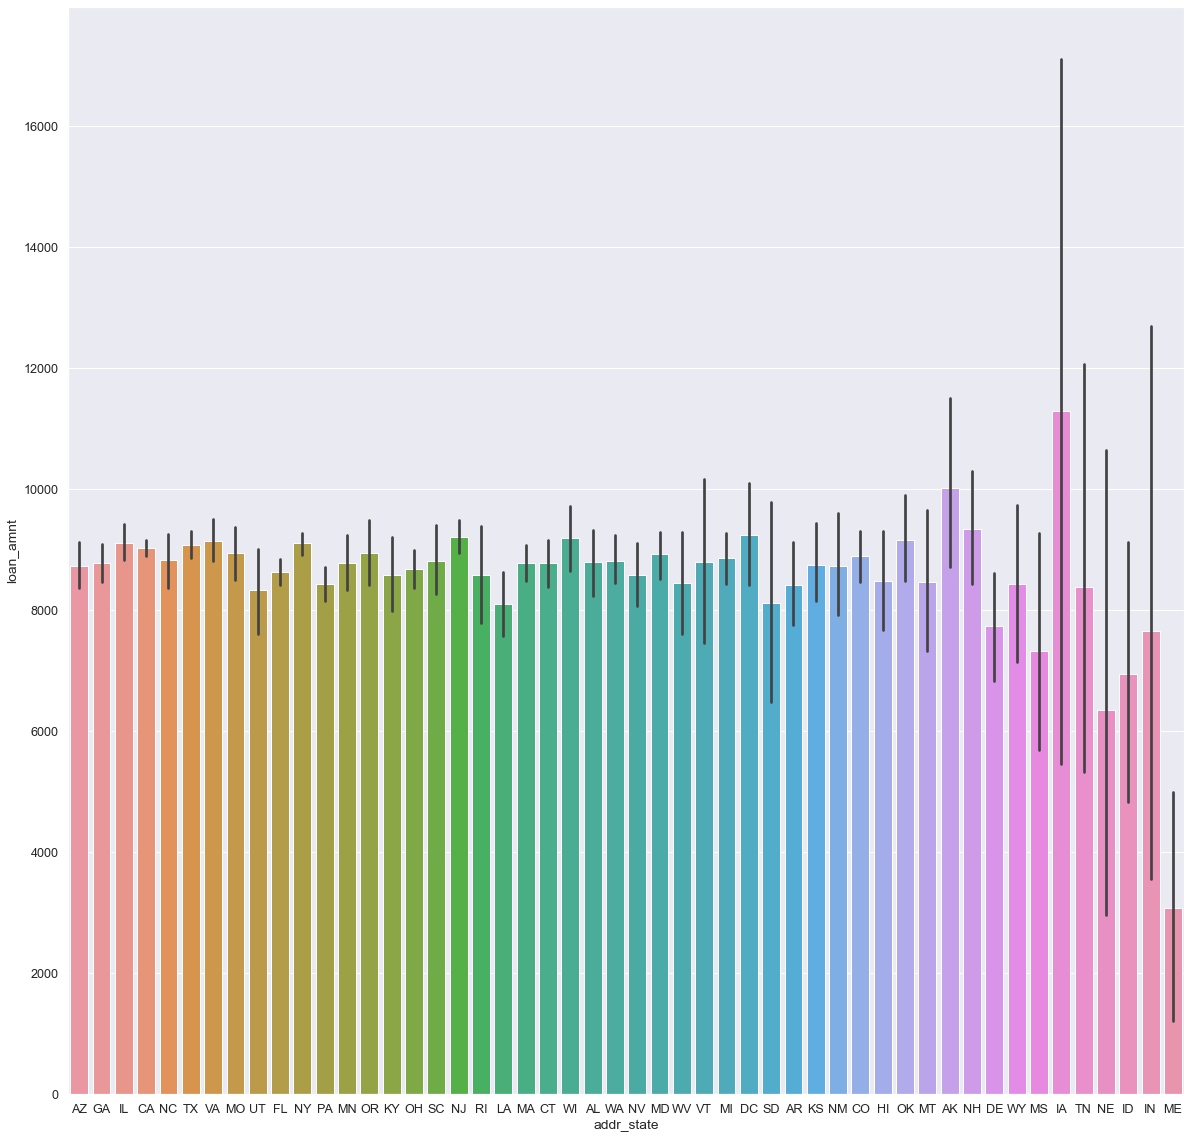

In [118]:
plt.figure(figsize=(20,20))
sns.barplot(data=loandataframe[['loan_amnt','addr_state','loan_status']],x='addr_state',y='loan_amnt')

Loan Amount
Maximum number of charged off
1. loan amount 5.5k and interest rate is in between 14-12%
2. loan amount 5.5k and grade is B
3. loan amount 5.5k-10K and installments are between 100-300
4. loan amount 5.5k-10K and emp-length 1 or 10 Years
5. loan amount 5.5k-10K and homeownership as Rent
6. loan amount 5.5k-10K and purpose is debt_consolidation
7. loan amount 5.5k-10K and state CA
8. Maxmimum loan amount charged off by smallbuisness
9. Maximum loan amout charged off by state NE

## 2. int_rate
#### int_rate vs installment

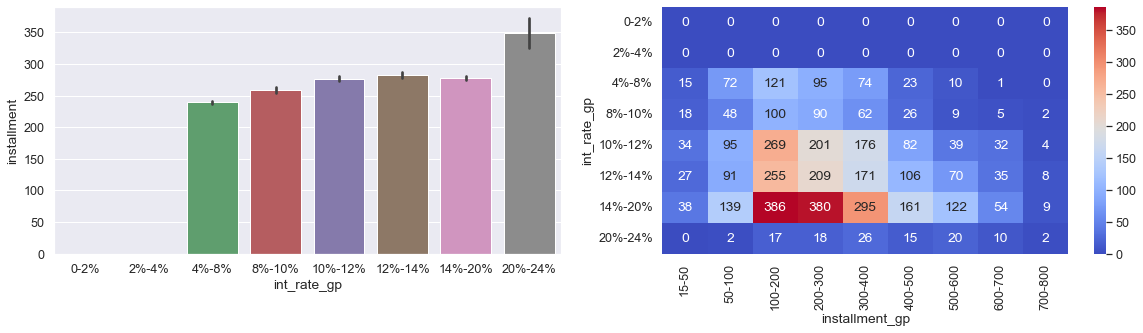

In [119]:
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','installment_gp','loan_status_int',['int_rate_gp','installment'])


#### int_rate vs (annual_inc,grade,emp_length, home_ownership,issue_m,issue_y, Verification) on loan_status

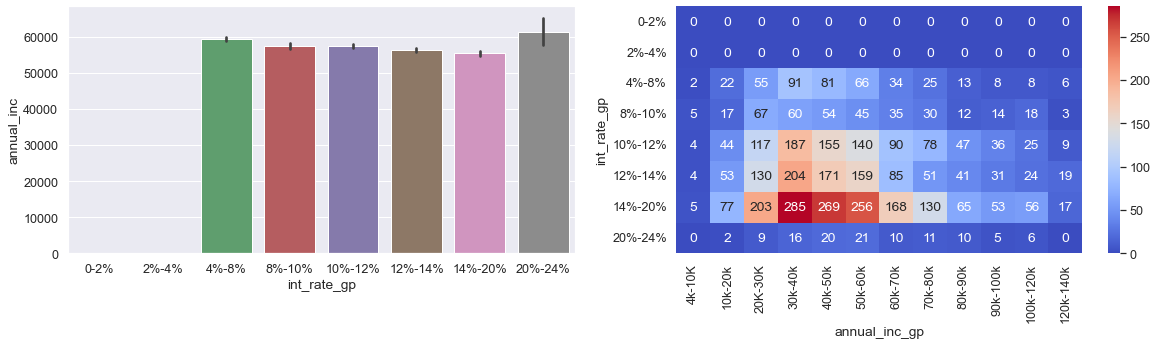

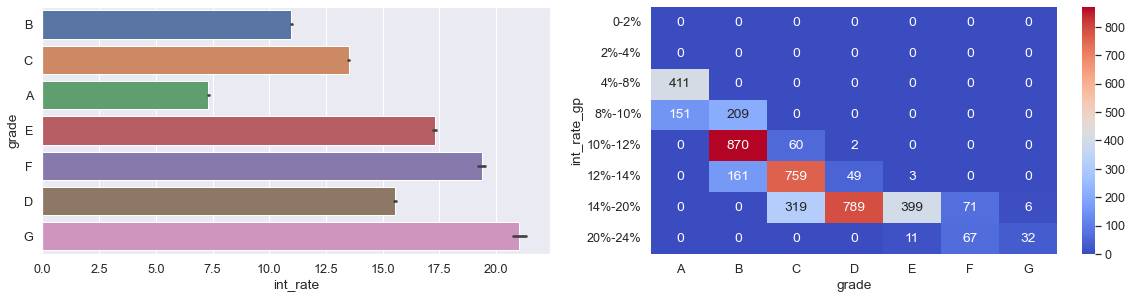

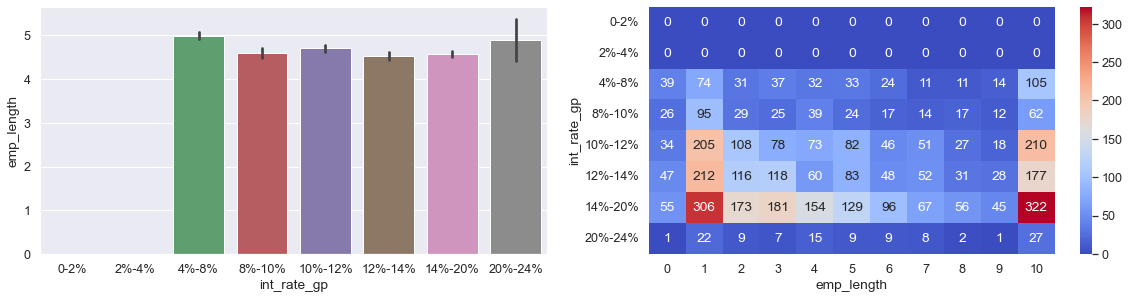

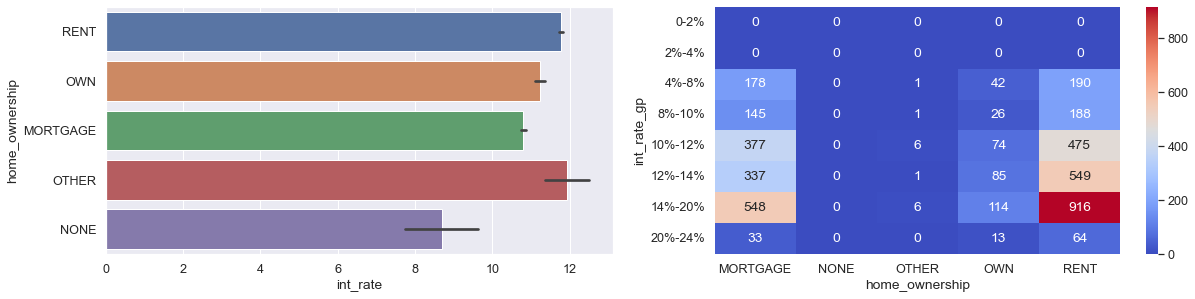

In [120]:
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','annual_inc_gp','loan_status_int',['int_rate_gp','annual_inc'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','grade','loan_status_int',['int_rate','grade'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','emp_length','loan_status_int',['int_rate_gp','emp_length'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','home_ownership','loan_status_int',['int_rate','home_ownership'])



int_rate vs issue_m, issue_y

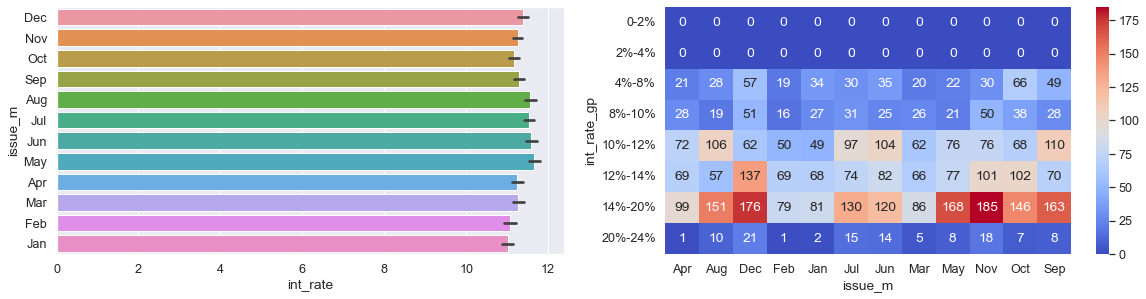

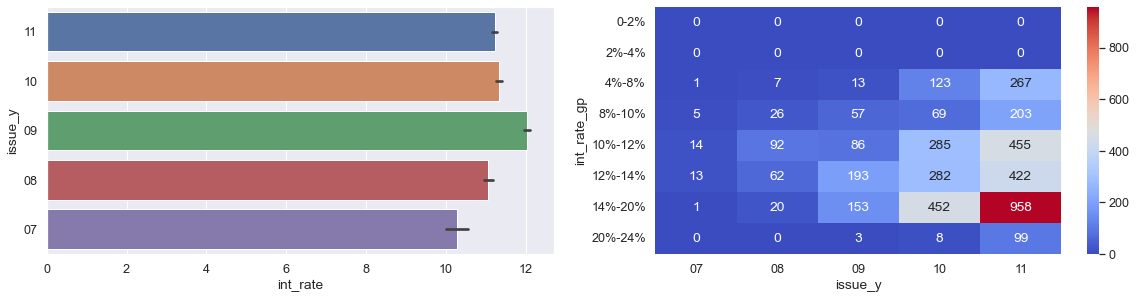

In [121]:
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','issue_m','loan_status_int',['int_rate','issue_m'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','issue_y','loan_status_int',['int_rate','issue_y'])

Interest Rate
Maxmimum number of charge-off 
1. for 14-20% interest rate, if annualincome is in 30k-40k range.
2. for 12-20% interest rate, if grade is in B,C,D.
3. for 14-20% interest rate, if emp-length is eithier 1,10.
4. for 14-20% interest rate, if home_ownership is at Rent.
5. for 14-20% interest rate, if month is Nov,Dec
6. for 14-20% interest rate, if issue_y is 2011

## 3 . Annual Income
### annual_inc vs(grade,emp_length, home_ownership,issue_m,issue_y, Verification,purpose,addr_state)

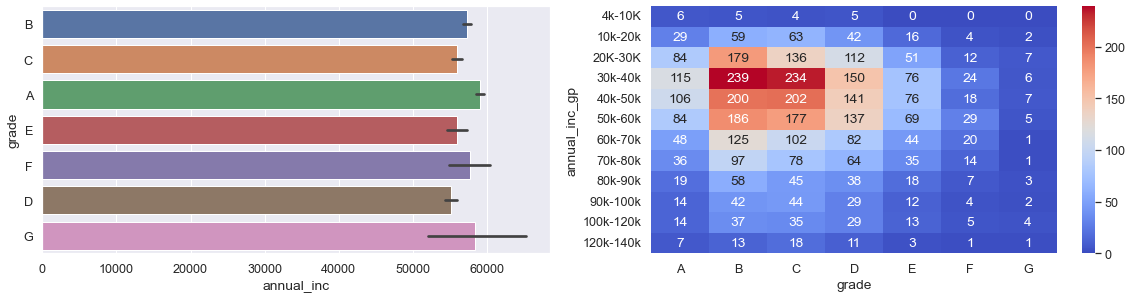

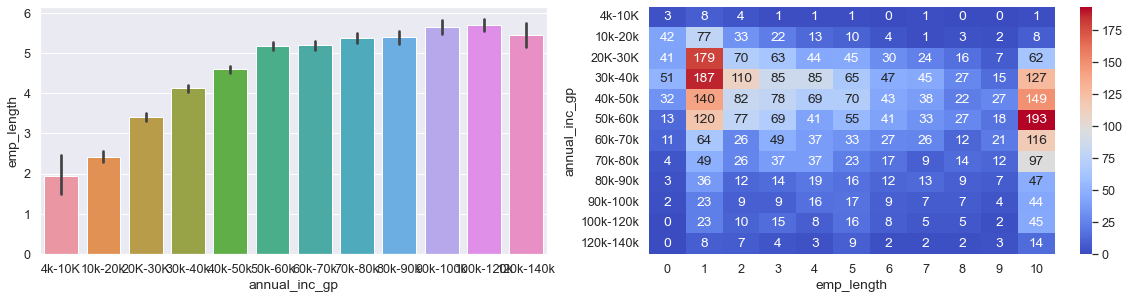

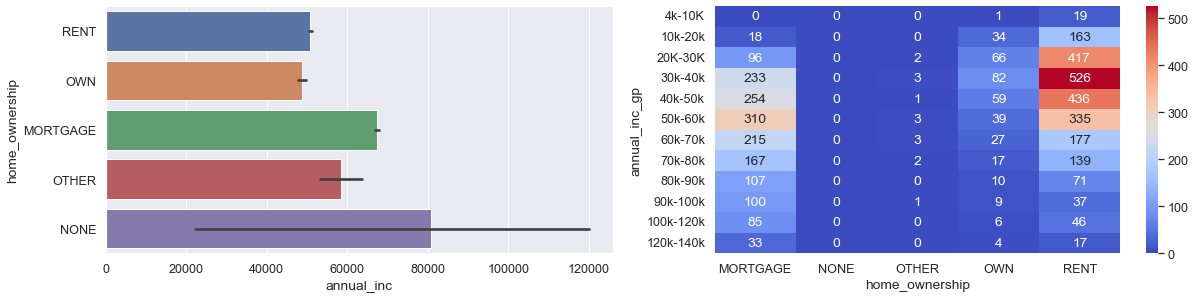

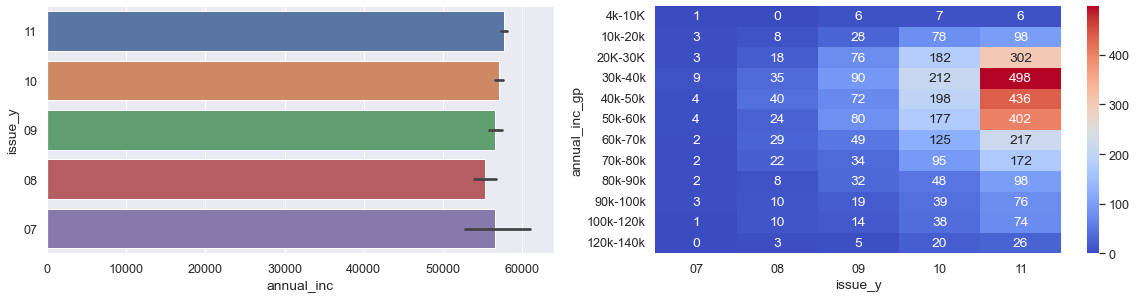

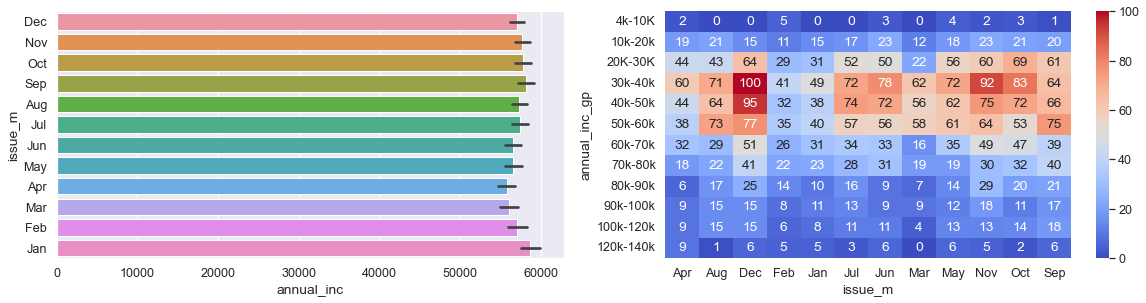

In [122]:
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','grade','loan_status_int',['annual_inc','grade'])
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','emp_length','loan_status_int',['annual_inc_gp','emp_length'])
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','home_ownership','loan_status_int',['annual_inc','home_ownership'])
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','issue_y','loan_status_int',['annual_inc','issue_y'])
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','issue_m','loan_status_int',['annual_inc','issue_m'])

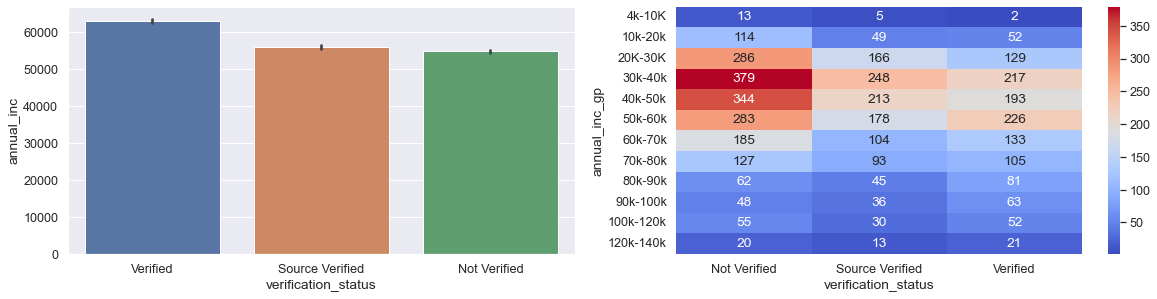

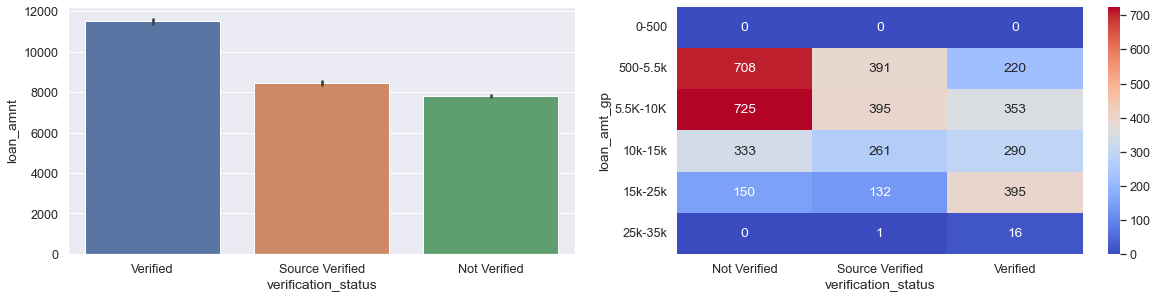

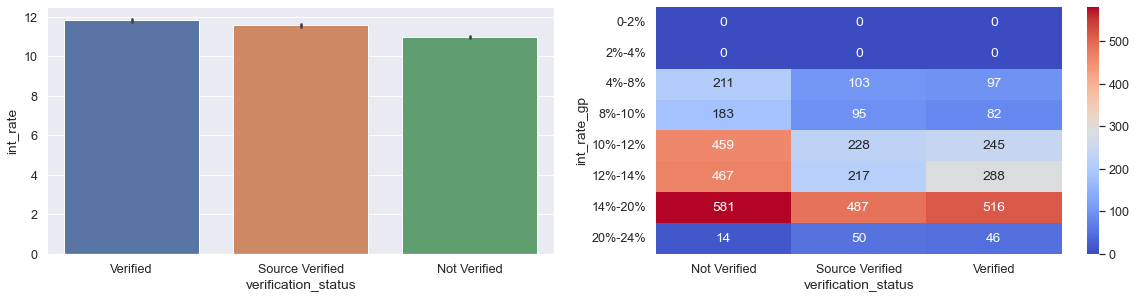

In [123]:
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','verification_status','loan_status_int',['verification_status','annual_inc'])
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','verification_status','loan_status_int',['verification_status','loan_amnt'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','verification_status','loan_status_int',['verification_status','int_rate'])

<AxesSubplot:xlabel='purpose', ylabel='annual_inc_gp'>

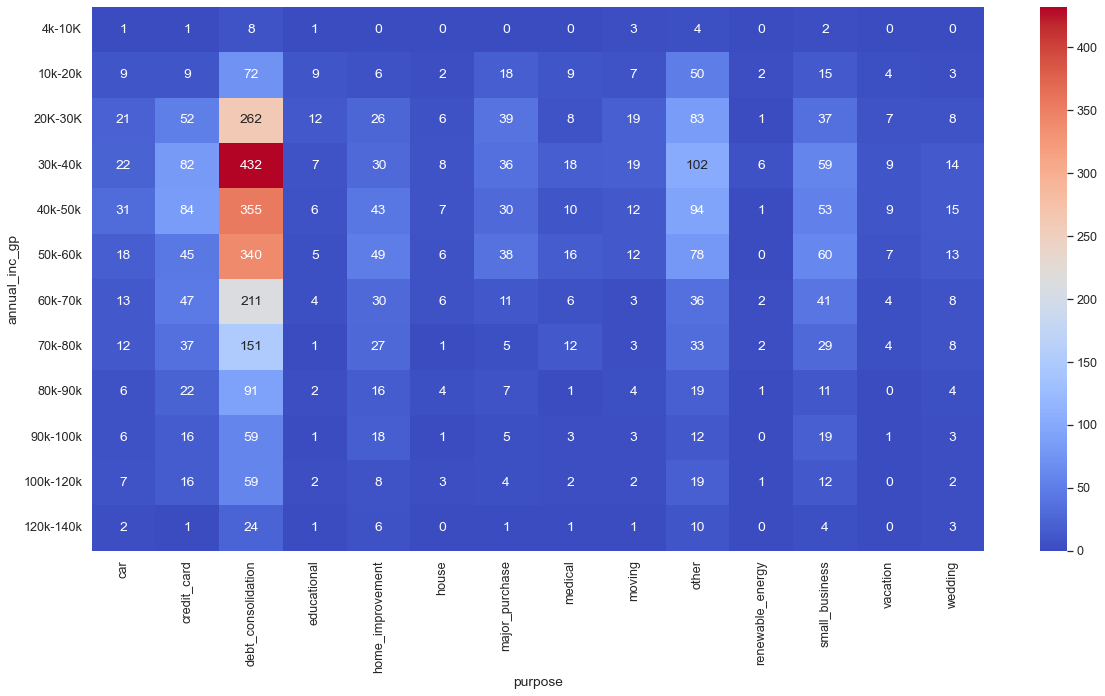

In [124]:
plt.figure(figsize=(20,10))
pt_anninc_purpose=pd.pivot_table(data=loandataframe,values='loan_status_int',index='annual_inc_gp',columns='purpose', aggfunc=np.sum)
sns.heatmap(pt_anninc_purpose,cmap='coolwarm',annot=True,fmt='d')

<AxesSubplot:xlabel='addr_state', ylabel='annual_inc'>

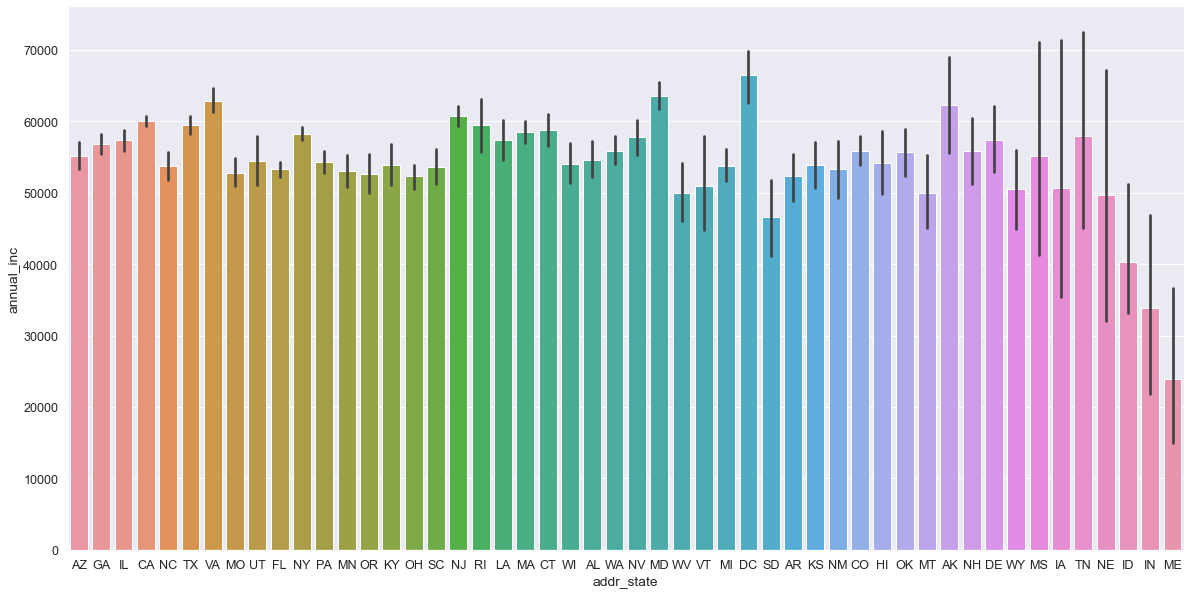

In [125]:
plt.figure(figsize=(20,10))
sns.barplot(data=loandataframe,x='addr_state',y='annual_inc')

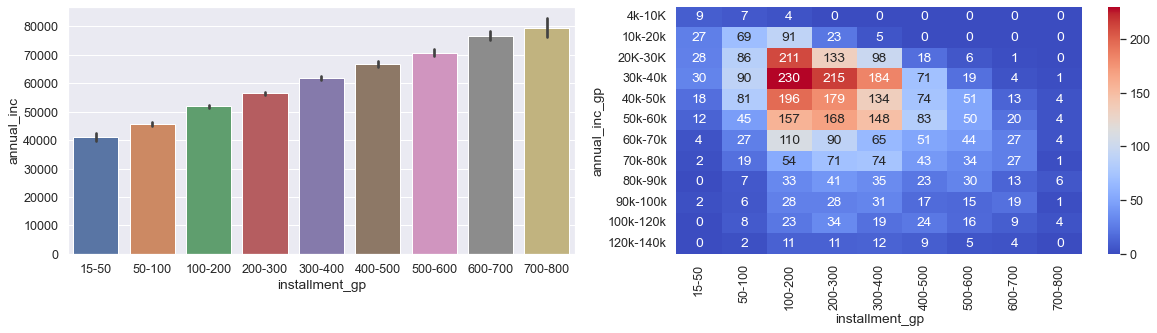

In [126]:
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','installment_gp','loan_status_int',['installment_gp','annual_inc'])

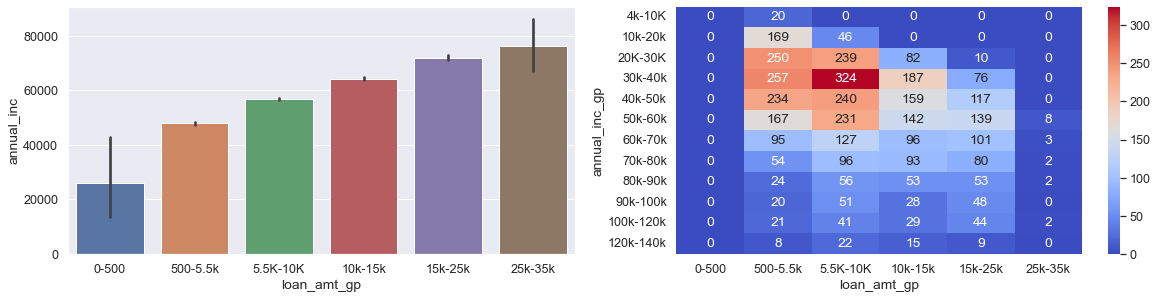

In [127]:
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','loan_amt_gp','loan_status_int',['loan_amt_gp','annual_inc'])


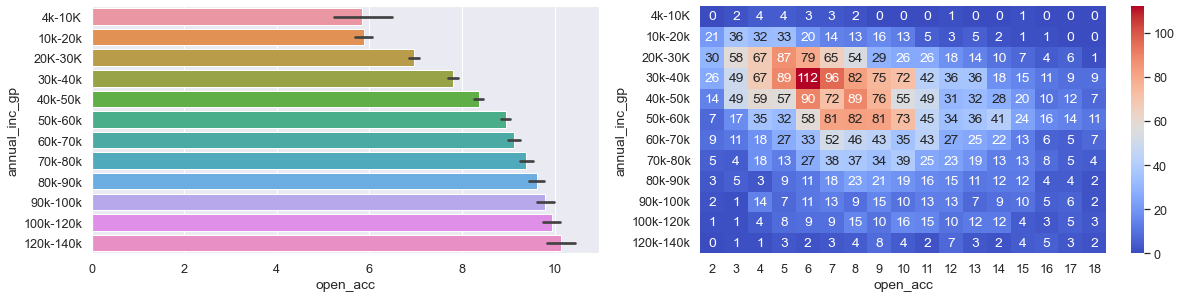

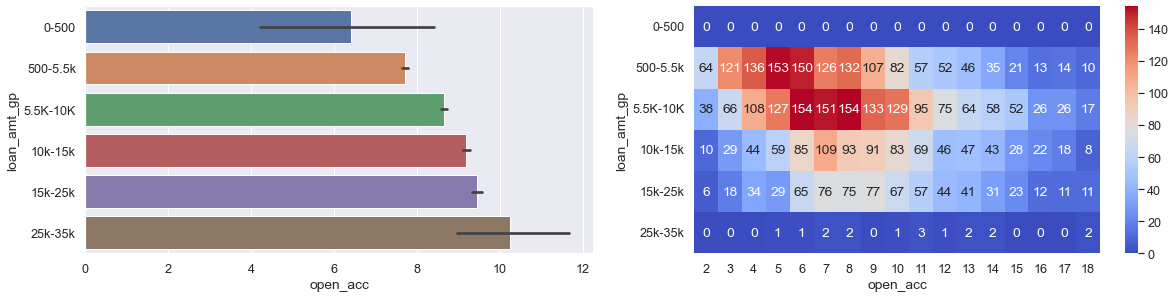

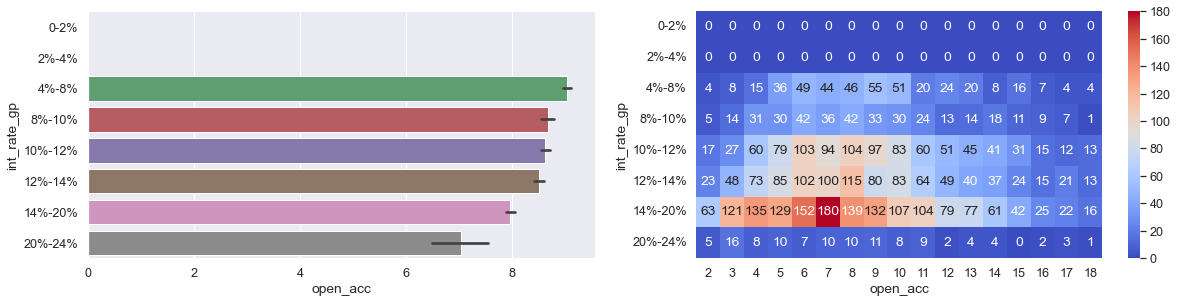

In [128]:
pivotHeatmapAnalysis(loandataframe,'annual_inc_gp','open_acc','loan_status_int',['open_acc','annual_inc_gp'])
pivotHeatmapAnalysis(loandataframe,'loan_amt_gp','open_acc','loan_status_int',['open_acc','loan_amt_gp'])
pivotHeatmapAnalysis(loandataframe,'int_rate_gp','open_acc','loan_status_int',['open_acc','int_rate_gp'])

Annual Income
Maxmimum number of charge-off 
1. for annual income in 30k-40k range and grade is B &C
2. for annual income in 30-40K and 50-60K range for employee duration of 10 & 1 respectively 
3. for annual income in 30-40K, and house ownership is Rent
4. for annual income in 30-40k, and issue year is 2011
5. for annual income in3 0-40k, and verification status is 'Not-Verified'
6  for annual income in 30-40k, and purpose is debt_consolidation
7. for annual income in20k-40K, and installment is in 100-300
8  for annual income in30-40k, and open_acc is 7 

### Overall observation from Bivariate Analysis
Probability of having Defaulters are more if they belong to below category in combination 
* When Applicant have annual income in range of 30K-40K.
* And applied for Loan amount in between 5.5K -10K
* And even chose higher interest rate of 14-20%,
* Also having an employment history of either 1 or 10 years.
* Also Chose to repay installment in 100-300 installments,
* Also the loan issued in the month of Nov. to Dec.
* As well if applicant is not verified.
*  As well If applicant has 7-8 bank accounts
* And loan is taken for the purpose of “debt_considation”
